### Project Name: Credit Card Default Prediction

Project type: Classification

Contributor: Shubham Harde

### Problem Statement:
A Card issuing Bank has over issued its cash and credit card in-order-to increase its market share, even to unqualified applicants. At the same time, most cardholders, irrespective of their repayment ability, overused credit card for consumption and accumulated heavy credit and cash– card debts. The crisis caused the blow to consumer finance confidence and it is a big challenge for both banks and cardholders. From the perspective of risk control, estimating the probability of default will be more meaningful than classifying customers into the binary results – risky and non-risky.

### Description of the Data:
This research employed a binary variable – default payment, Y (Yes = 1, No = 0), as the response variable. <br>This study used the following 23 variables as explanatory variables: 

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit<br>
X2: Gender (1 = male; 2 = female) <br>
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others) <br>
X4: Marital status (1 = married; 2 = single; 3 = others) <br>
X5: Age (year). <br>
X6–X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: <br>
X6 = the repayment status in September, 2005 <br>
X7 = the repayment status in August, 2005 <br>
X11 = the repayment status in April, 2005 <br>

The measurement scale for the repayment status is: <br>
0 = pay duly; <br>
1 = payment delay for one month <br>
2 = payment delay for two months <br>
8 = payment delay for eight months <br>
9 = payment delay for nine months and above<br>

X12–X17: Amount of bill statement (NT dollar) <br>
X12 = amount of bill statement in September,2005 <br>
X13 = amount of bill statement in August, 2005 <br>
X17 = amount of bill statement in April, 2005 <br>
X18–X23: Amount of previous payment (NT dollar) <br>
X18 = amount paid in September,2005 <br>
X19 = amount paid in August,2005 <br>
X23 = amount paid in April, 2005 <br>


### Analytics tasks:
•  Analyze the trend on outstanding amount for the bank <br>
•  Is there any relationship between in outstanding amount / trend with respect to age, education, marriage, credit limit<br>
•  Does outstanding amount / trend affect the default behavior in next month.<br>
•  Identify the errors in dataset<br>
•  Clean those errors in the dataset.<br>
•  Try to Apply Statistics like EDA, Confidence Interval, Probability Distribution & Hypothesis<br>
•  Build ML Model using Logistic Regression & Decision Tree Classifier and Apply Feature Selection Techniques, Feature        Scaling & Label Encoding Techniques<br>

#### 1. Know Your Data

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import missingno as msno
%matplotlib inline

#Library of warnings would assist to ignore warning issued
import warnings
warnings.filterwarnings('ignore')

#Import necessary statistical libraries
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from scipy.stats import ks_2samp

# import necessary libraries for feature engineering
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#Import libraries for machine learning model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier

##### 1. Dataset Loading

In [2]:
#load dataset
cr_df = pd.read_excel("F:/DS2024/Projects/default_of_credit_card_clients_0.xlsx")

Dataset First View

In [3]:
cr_df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2      0      0   
1   2     120000    2          2         2   26      0      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57      0      0      0      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0         0                           1  
1      1000         0      2000                           1  
2      1000      1000      5000                           0  
3      1100      1069      1000                           0  
4      9000       689       679                           0  

[5 rows x 25 columns]

Dataset Rows & Column Count &#x25BC;

In [4]:
#dataset rows & column count
cr_df.shape

(30000, 25)

the dataset has 30000 rows and 25 columns

Dataset Information &#x25BC;

In [5]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
cr_df.describe(include='all').T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0       0.356767       0.760594       0.0   
PAY_2                       30000.0       0.320033       0.801727       0.0   
PAY_3                       30000.0       0.304067       0.790589       0.0   
PAY_4                       30000.0       0.258767       0.761113       0.0   
PAY_5                       30000.0       0.221500       0.717720       0.0   
PAY_6                       30000.0       0.226567       0.715438       0.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                           0.00       0.0       0.00        8.0  
PAY_2                           0.00       0.0       0.00        8.0  
PAY_3                           0.00       0.0       0.00        8.0  
PAY_4                           0.00       0.0       0.00        8.0  
PAY_5                           0.00       0.0       0.00        8.0  
PAY_6                           0.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

Duplicates Values &#x25BC;

In [7]:
#dataset dupliucate value count
cr_df.duplicated().value_counts()

False    30000
dtype: int64

Missing Values/Null Values &#x25BC;

In [8]:
#missing values and null values count
null_values = cr_df.isnull().sum()
null_values

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<AxesSubplot:>

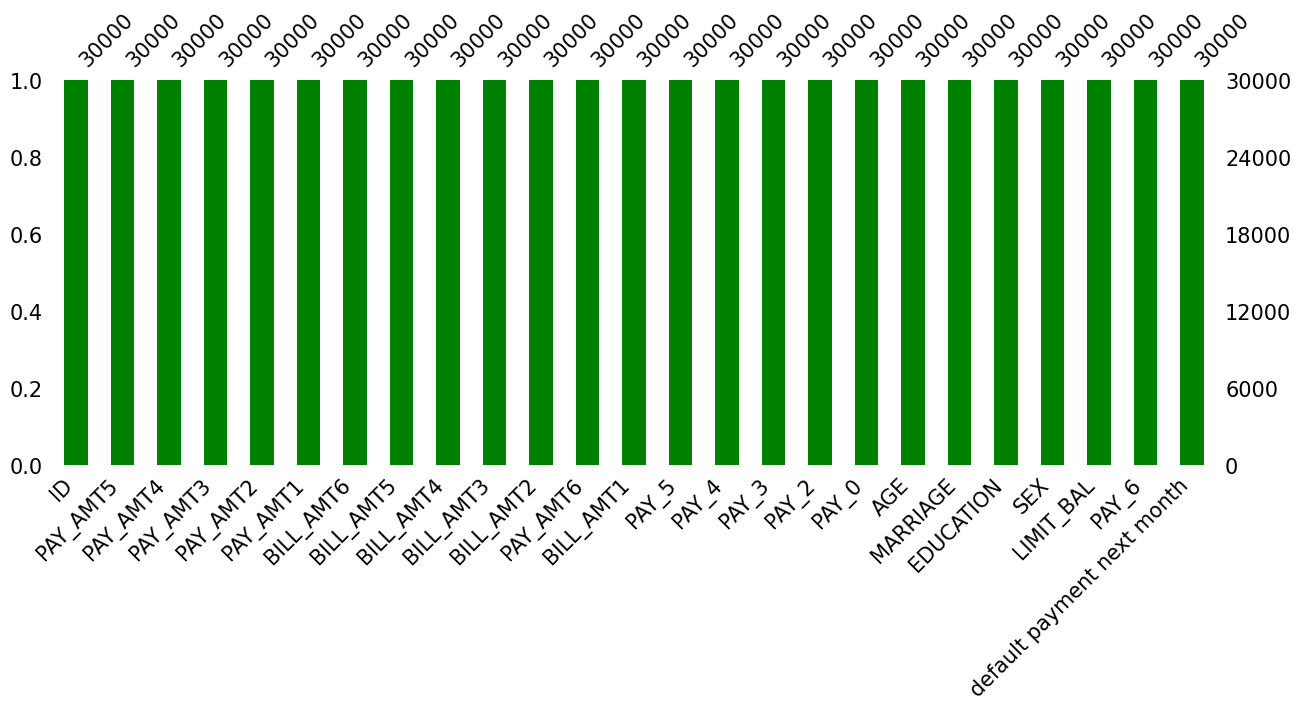

In [9]:
#visualizing the missing values
msno.bar(cr_df, color='green', sort='ascending', figsize=(15,5), fontsize=15)

<AxesSubplot:>

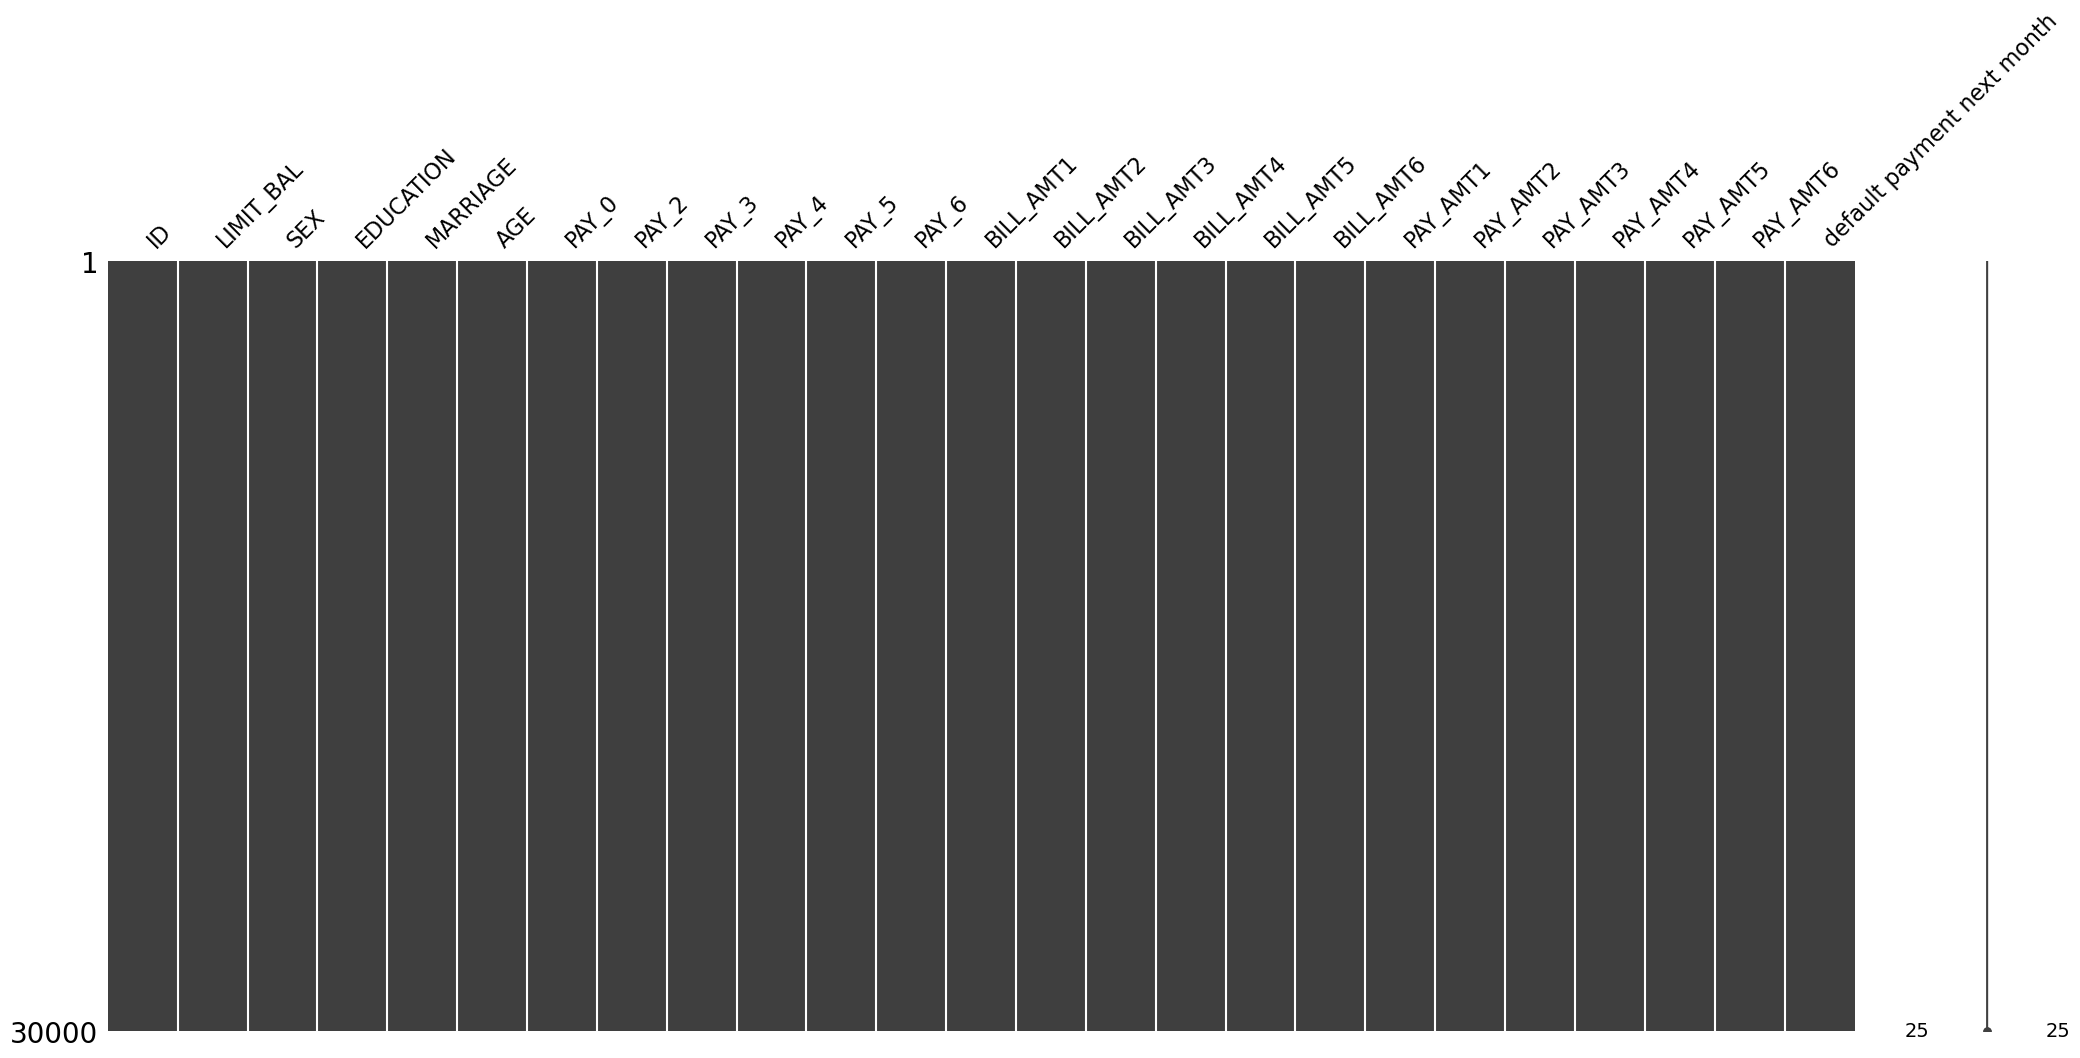

In [10]:
msno.matrix(cr_df)

If missing values present then above graph will show white horizontal space with respect to the perticular bar

What did you know about your dataset?

1. The data set has a shape of 30000 rows and 25 columns
2. There is no missing values or duplicates values present in the data set
3. This is a complete and clean data

#### 2. Understanding Your Variables

In [11]:
#Dataset Columns
cr_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [12]:
#Dataset Describe
cr_df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0       0.356767       0.760594       0.0   
PAY_2                       30000.0       0.320033       0.801727       0.0   
PAY_3                       30000.0       0.304067       0.790589       0.0   
PAY_4                       30000.0       0.258767       0.761113       0.0   
PAY_5                       30000.0       0.221500       0.717720       0.0   
PAY_6                       30000.0       0.226567       0.715438       0.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default payment next month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                           0.00       0.0       0.00        8.0  
PAY_2                           0.00       0.0       0.00        8.0  
PAY_3                           0.00       0.0       0.00        8.0  
PAY_4                           0.00       0.0       0.00        8.0  
PAY_5                           0.00       0.0       0.00        8.0  
PAY_6                           0.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default payment next month      0.00       0.0       0.00        1.0

##### Variable Description

This research employed a binary variable – default payment, Y (Yes = 1, No = 0), as the response variable. This study used the following 23 variables as explanatory variables: 

**ID__**: Unique ID of each client <br>
**Limit_Bal**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br>
**Gender**: 1 = male; 2 = female<br>
**Education**: 1 = graduate school; 2 = university; 3 = high school; 4 = others<br>
**Marital status**: 1 = married; 2 = single; 3 = others<br>
**Age**: year<br>

**History of past payment.**<br>
We tracked the past monthly payment records (from April to September, 2005) as follows: <br>
**PAY_0** = the repayment status in September, 2005 <br>
**PAY_2** = the repayment status in August, 2005<br>
**PAY_3** = the repayment status in July, 2005<br>
**PAY_4** = the repayment status in June, 2005<br>
**PAY_5** = the repayment status in May, 2005<br>
**PAY_6** = the repayment status in April, 2005<br>

The measurement scale for the repayment status is: <br>
0 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; ...; 8 = payment delay for eight months; 9 = payment delay for nine months and above. <br>

**Amount of bill statement (NT dollar)**<br>
**BILL_AMT1**: amount of bill statement in September,2005<br>
**BILL_AMT2** = amount of bill statement in August, 2005<br>
**BILL_AMT3** = amount of bill statement in July, 2005<br>
**BILL_AMT4**: amount of bill statement in June,2005<br>
**BILL_AMT5** = amount of bill statement in May, 2005<br>
**BILL_AMT6** = amount of bill statement in April, 2005<br>


**Amount of previous payment (NT dollar)**<br>
**PAY_AMT1** = amount paid in September,2005; <br>
**PAY_AMT2**  = amount paid in August,2005; <br>
**PAY_AMT3**  = amount paid in July, 2005. <br>
**PAY_AMT4** = amount paid in June,2005; <br>
**PAY_AMT5**  = amount paid in May,2005; <br>
**PAY_AMT6**  = amount paid in April, 2005.<br> 
**default payment next month**: Default Payment (1=Yes, 0=No)<br>

##### Check Unique Values for each variable

In [13]:
#check unique values for each variable from dataset
for i in cr_df.columns.to_list():
    print("The unique values number count", i,"is", cr_df[i].nunique())

The unique values number count ID is 30000
The unique values number count LIMIT_BAL is 81
The unique values number count SEX is 2
The unique values number count EDUCATION is 7
The unique values number count MARRIAGE is 4
The unique values number count AGE is 56
The unique values number count PAY_0 is 9
The unique values number count PAY_2 is 9
The unique values number count PAY_3 is 9
The unique values number count PAY_4 is 9
The unique values number count PAY_5 is 8
The unique values number count PAY_6 is 8
The unique values number count BILL_AMT1 is 22723
The unique values number count BILL_AMT2 is 22346
The unique values number count BILL_AMT3 is 22026
The unique values number count BILL_AMT4 is 21548
The unique values number count BILL_AMT5 is 21010
The unique values number count BILL_AMT6 is 20604
The unique values number count PAY_AMT1 is 7943
The unique values number count PAY_AMT2 is 7899
The unique values number count PAY_AMT3 is 7518
The unique values number count PAY_AMT4 is

##### 3. Data Wrangling

In [14]:
#creating a copy of dataset for analysyis purpose (EDA)
credit_df = cr_df.copy()

In [15]:
credit_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [16]:
#renaming the columns to appropriate names.

#renaming dependent variables
credit_df.rename(columns={'default payment next month':'IsDefaulter'}, inplace=True)

#changing name of some columns for simplicity and for better understanding
credit_df.rename(columns={'PAY_0':'REPAY_STS_SEPT', 'PAY_2':'REPAY_STS_AUG', 'PAY_3':'REPAY_STS_JUL', 'PAY_4':'REPAY_STS_JUN', 'PAY_5':'REPAY_STS_MAY', 'PAY_6':'REPAY_STS_APR'}, inplace=True)
credit_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT', 'BILL_AMT2':'BILL_AMT_AUG', 'BILL_AMT3':'BILL_AMT_JUL', 'BILL_AMT4':'BILL_AMT_JUN', 'BILL_AMT5':'BILL_AMT_MAY', 'BILL_AMT6':'BILL_AMT_APR'}, inplace=True)
credit_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT', 'PAY_AMT2':'PAY_AMT_AUG', 'PAY_AMT3':'PAY_AMT_JUL', 'PAY_AMT4':'PAY_AMT_JUN', 'PAY_AMT5':'PAY_AMT_MAY', 'PAY_AMT6':'PAY_AMT_APR'}, inplace=True)

#dropping id from dataset
credit_df.drop('ID', axis=1, inplace=True)

In [17]:
#replacing values with there labels
credit_df.replace({'SEX': {1:'Male', 2:'Female'}}, inplace=True)
credit_df.replace({'EDUCATION': {1:'Graduate School', 2:'University', 3:'High School', 4:'Others', 5:'Others', 6:'Others', 0:'Others'}}, inplace=True)
credit_df.replace({'MARRIAGE': {1:'Married', 2:'Single', 3:'Others', 0:'Others'}}, inplace=True)
credit_df.replace({"IsDefaulter": {1:'Yes', 0:'No'}}, inplace=True)

In [18]:
#data frame for EDA analysis
credit_df.head()

LIMIT_BAL     SEX   EDUCATION MARRIAGE  AGE  REPAY_STS_SEPT  REPAY_STS_AUG  \
0      20000  Female  University  Married   24               2              2   
1     120000  Female  University   Single   26               0              2   
2      90000  Female  University   Single   34               0              0   
3      50000  Female  University  Married   37               0              0   
4      50000    Male  University  Married   57               0              0   

   REPAY_STS_JUL  REPAY_STS_JUN  REPAY_STS_MAY  ...  BILL_AMT_JUN  \
0              0              0              0  ...             0   
1              0              0              0  ...          3272   
2              0              0              0  ...         14331   
3              0              0              0  ...         28314   
4              0              0              0  ...         20940   

   BILL_AMT_MAY  BILL_AMT_APR  PAY_AMT_SEPT  PAY_AMT_AUG  PAY_AMT_JUL  \
0             0             0             0          689            0   
1          3455          3261             0         1000         1000   
2         14948         15549          1518         1500         1000   
3         28959         29547          2000         2019         1200   
4         19146         19131          2000        36681        10000   

   PAY_AMT_JUN  PAY_AMT_MAY  PAY_AMT_APR  IsDefaulter  
0            0            0            0          Yes  
1         1000            0         2000          Yes  
2         1000         1000         5000           No  
3         1100         1069         1000           No  
4         9000          689          679           No  

[5 rows x 24 columns]

What Manipulation done and insight you found?

converting numerical values to categorical values for easy understanding

#### 4. Data Vizualization, Storytelling & Experimenting with charts: To understand the relationship between variables

In [19]:
pip install pandas_profiling

Note: you may need to restart the kernel to use updated packages.


In [20]:
from pandas_profiling import ProfileReport

In [21]:
Profile = ProfileReport(credit_df, title="Credit Profile Report", explorative=True)
Profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Chart1: Dependent Variable Analysis

[Click here to view the HTML profile report](http://localhost:8888/view/output.html)

Chart1 - Dependent Variable Analysis

In [22]:
counts_defaulter = credit_df['IsDefaulter'].value_counts()

# Create pie chart trace
fig = go.Figure(data=[go.Pie(labels=['Nondefaulter', 'Defaulter'], values=counts_defaulter.values)])
fig.update_layout(title_text="Pie Chart of Defaulter Status")
fig.show()

1. Why did yo pick the specific chart?
> Pie Chart used to represent the summarizing set of nominal data or displays the different values of a given categorical vaariable(Percentage Distribution)

2. What are the insights found from the chart?
> From the graph we can see that number of defaulter(22.1%) is less than the non defaulter(77.9%)

3.Gained insight from the pie chart helps to create positive business impact?
> Yes, class imbalance can have -ve impact on classification model accurary, so we must address this issue before putting the data into training

Chart2 - Visualization of Gender Column

In [23]:
defaulter_counts = credit_df.groupby(['SEX', 'IsDefaulter']).size().reset_index(name='Count')

# Univariate analysis of gender column
fig1 = px.pie(values=credit_df['SEX'].value_counts(),names=['Female', 'Male'],title='Distribution Male and Female')

# Bivariate analysis Sex vs Defaulters
fig2 = px.bar(data_frame=defaulter_counts,x='SEX',y='Count',color='IsDefaulter',barmode='stack',
              title='Bivariate Analysis: SEX VS IS DEFAULTERS',
              labels={'SEX': 'SEX', 'Count': 'Count', 'IsDefaulter': 'Defaulters'})

fig1.show()
fig2.show()

In [24]:
TEST = credit_df.groupby(by=['SEX', 'IsDefaulter'])
count_values = TEST['IsDefaulter'].count()
count_values

SEX     IsDefaulter
Female  No             14349
        Yes             3763
Male    No              9015
        Yes             2873
Name: IsDefaulter, dtype: int64

1. Why did you pick the specific chart?
> pie chart analysis percentage distribution of a feature and bar chart is to compare the feature column values with dependent variable

2. What are the insight found fro the chart?
> Female customers are more than the male customer // There are 3763 female customer defaulters and 2874 male customer defaulters

3. Will the gained insight help creating a positive business impact? are there any insight that lead to negative growth?
> As the positive side female customers are better customers compared to male as the non defualters are maximum lies in female category // no negative impact

Chart3 - Education column Vs Defaulters

In [25]:
defaulter_counts = credit_df.groupby(['EDUCATION', 'IsDefaulter']).size().reset_index(name='Count')

# Univariate analysis of gender column
fig1 = px.pie(values=credit_df['EDUCATION'].value_counts(),names=['Graduate School','University','High School','Others'],title='Distribution of Education Qualification of customers')

# Bivariate analysis Sex vs Defaulters
fig2 = px.bar(data_frame=defaulter_counts,x='EDUCATION',y='Count',color='IsDefaulter',barmode='stack',
              title='Bivariate Analysis: EDUCATION VS IS DEFAULTERS',
              labels={'EDUCATION': 'EDUCATION', 'Count': 'Count', 'IsDefaulter': 'Defaulters'})

fig1.show()
fig2.show()

In [26]:
TEST = credit_df.groupby(by=['EDUCATION', 'IsDefaulter'])
count_values = TEST['IsDefaulter'].count()
count_values

EDUCATION        IsDefaulter
Graduate School  No              8549
                 Yes             2036
High School      No              3680
                 Yes             1237
Others           No               435
                 Yes               33
University       No             10700
                 Yes             3330
Name: IsDefaulter, dtype: int64

Insight
> Most of the customers educational qualification is university pass out followed by graduate school pass out // most numbers of defualters is also from university but in terms of default ratio university people having less default ratio, high school have most default ratio

Chart 4 - Visualization of Mariage column

In [27]:
#chart 4  - visualization code
defaulter_counts = credit_df.groupby(['MARRIAGE', 'IsDefaulter']).size().reset_index(name='Count')

# Univariate analysis of gender column
fig1 = px.pie(values=credit_df['MARRIAGE'].value_counts(),names=['Married', 'Single', 'Others'],title='Distribution Marriage Column')

# Bivariate analysis Sex vs Defaulters
fig2 = px.bar(data_frame=defaulter_counts,x='MARRIAGE',y='Count',color='IsDefaulter',barmode='stack',
              title='Bivariate Analysis: MARRIAGE VS IS DEFAULTERS',
              labels={'MARRIAGE': 'MARRIAGE', 'Count': 'Count', 'IsDefaulter': 'Defaulters'})

fig1.show()
fig2.show()

In [28]:
TEST = credit_df.groupby(by=['MARRIAGE', 'IsDefaulter'])
count = TEST['IsDefaulter'].value_counts()
count

MARRIAGE  IsDefaulter  IsDefaulter
Married   No           No             10453
          Yes          Yes             3206
Others    No           No               288
          Yes          Yes               89
Single    No           No             12623
          Yes          Yes             3341
Name: IsDefaulter, dtype: int64

Insight
> Maximum card holder are single // Married people have higher default ratio

Business Impact
> Singles spends more than married people thus they will use credit card more frequently. As a result, targeting single people will undoubtly enhance sales

Chart 5 - Visualization of age column

In [29]:
# Create a histogram for the distribution of Age
fig_age_dist = px.histogram(credit_df, x='AGE', title='Distribution of Age of Credit Card Holder')

# Update histogram traces to add borders
fig_age_dist.update_traces(marker_line_color='black', marker_line_width=1, opacity=0.7)

# Create two data frames of male and female
Age_male = credit_df[credit_df['SEX'] == 'Male']
Age_female = credit_df[credit_df['SEX'] == 'Female']

# Plot age of male card holder vs Defaulter with gap
fig_male = px.histogram(Age_male, x='AGE', color='IsDefaulter', title='Age of Male v/s Defaulters', 
                        barmode='group', histnorm='percent',
                        category_orders={'IsDefaulter': ['No', 'Yes']})

# Plot age of female card holder vs Defaulter with gap
fig_female = px.histogram(Age_female, x='AGE', color='IsDefaulter', title='Age of Female v/s Defaulters', 
                          barmode='group', histnorm='percent',
                          category_orders={'IsDefaulter': ['No', 'Yes']})

# Update layout to set axis labels and show all age numbers
fig_age_dist.update_layout(xaxis=dict(type='category', categoryorder='category ascending'),
                           xaxis_title='Age', yaxis_title='Count')
fig_male.update_layout(xaxis=dict(type='category', categoryorder='category ascending'),
                       xaxis_title='Age', yaxis_title='Count')
fig_female.update_layout(xaxis=dict(type='category', categoryorder='category ascending'),
                         xaxis_title='Age', yaxis_title='Count')

# Show the plots
fig_age_dist.show()
fig_male.show()
fig_female.show()

Insight
> Most of the credit card holder belongs to 25-30 years

> Number of credit card holder are less above 60 years

> For equal are ratio of defaulter for male and female not varied much

> Above 50 years old the ratio of defaulter had increased

Business Impact
> Customers are fewer as the majority of defaulters are between the age of 20 and 25 and over the age of 60. Before issuing the credit card, it must be throughly reviewed. Otherwise, it may have a negative impact on carporate growth

Chart 6 - Visualization of Default Payment next month Column

Text(0, 0.5, 'Count')

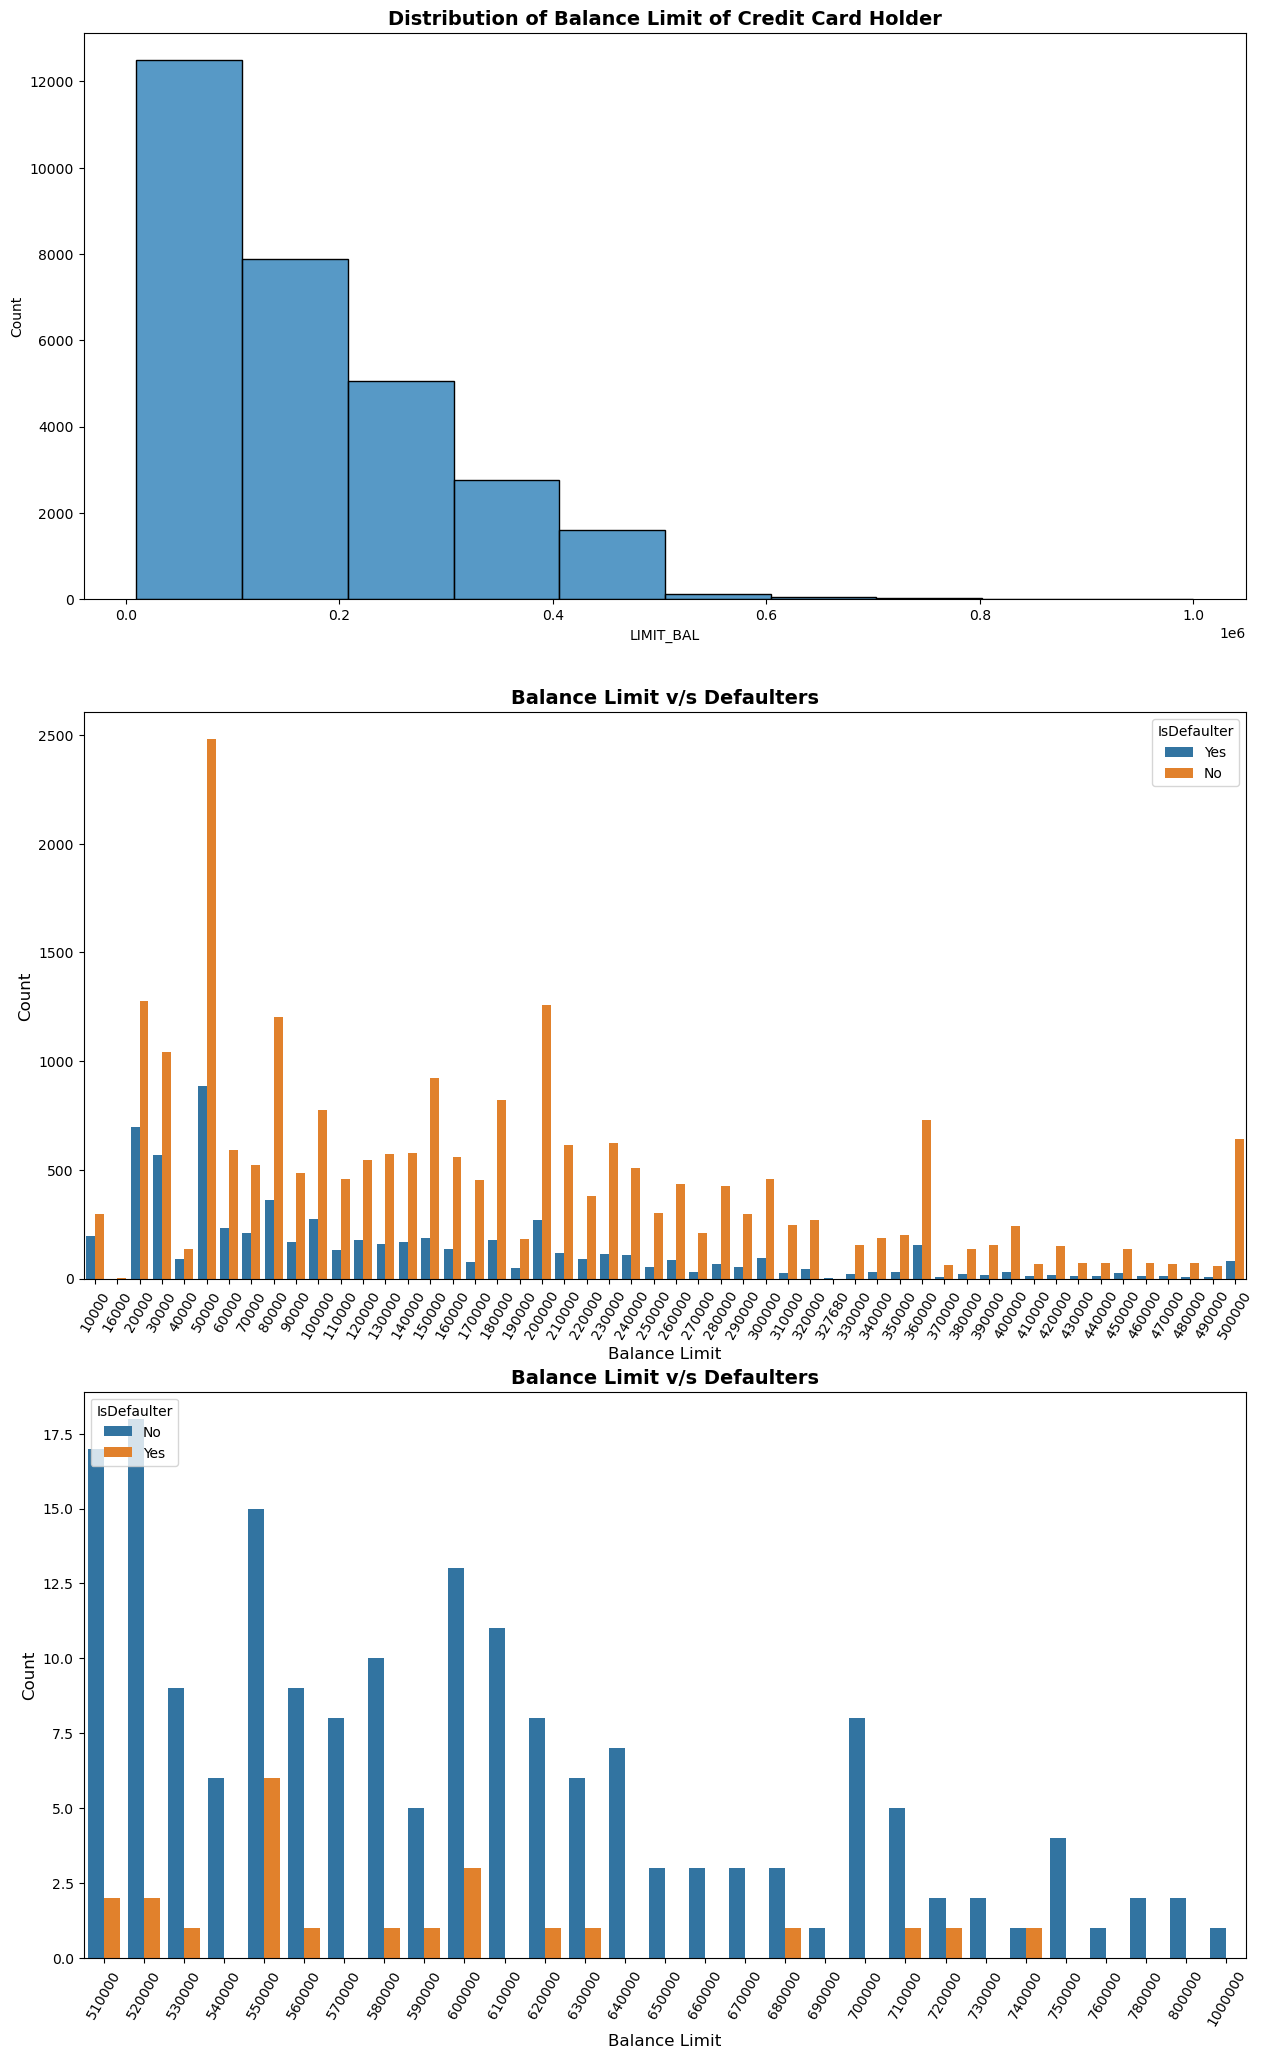

In [30]:
# chart - 6 visualization code By using matplotlib and seaborn lib
fig, ax = plt.subplots(3, 1, figsize=(15, 25))
# univariate analysis - distribution of Marriage
age_dist = sns.histplot(x=credit_df['LIMIT_BAL'], ax=ax[0], bins=10)
age_dist.set_title('Distribution of Balance Limit of Credit Card Holder', fontsize=14, fontweight='bold')
Limit_1 = credit_df[credit_df['LIMIT_BAL'] <= 500000]
Limit_2 = credit_df[credit_df['LIMIT_BAL'] > 500000]
# plot age of male card holder vs Defaulter
sns.countplot(x='LIMIT_BAL', hue='IsDefaulter', data=Limit_1, ax=ax[1])
ax[1].set_title('Balance Limit v/s Defaulters', fontsize=14, fontweight='bold')
ax[1].tick_params(axis='x', labelrotation=60)
ax[1].set_xlabel('Balance Limit', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
# plot age of male card holder vs Defaulter
sns.countplot(x='LIMIT_BAL', hue='IsDefaulter', data=Limit_2, ax=ax[2])
ax[2].set_title('Balance Limit v/s Defaulters', fontsize=14, fontweight='bold')
ax[2].tick_params(axis='x', labelrotation=60)
ax[2].set_xlabel('Balance Limit', fontsize=12)
ax[2].set_ylabel('Count', fontsize=12)

Insight:
> Maximum credit card limit is below 100000

> Very few credit limit are above 500000

> When credit limit is less than equal to 50k default ration is high

> default ratio is exceptionally high when credit limit is 550000 and 600000

Business Impact:
>Customers with credit limit of $ 50,000 or more are more likely to default, so the bank should charge them in the event of a default and may cut their limit to avoid any form of damage to the company

Chart 7 - Monthly Repayment Status vs Defaulters

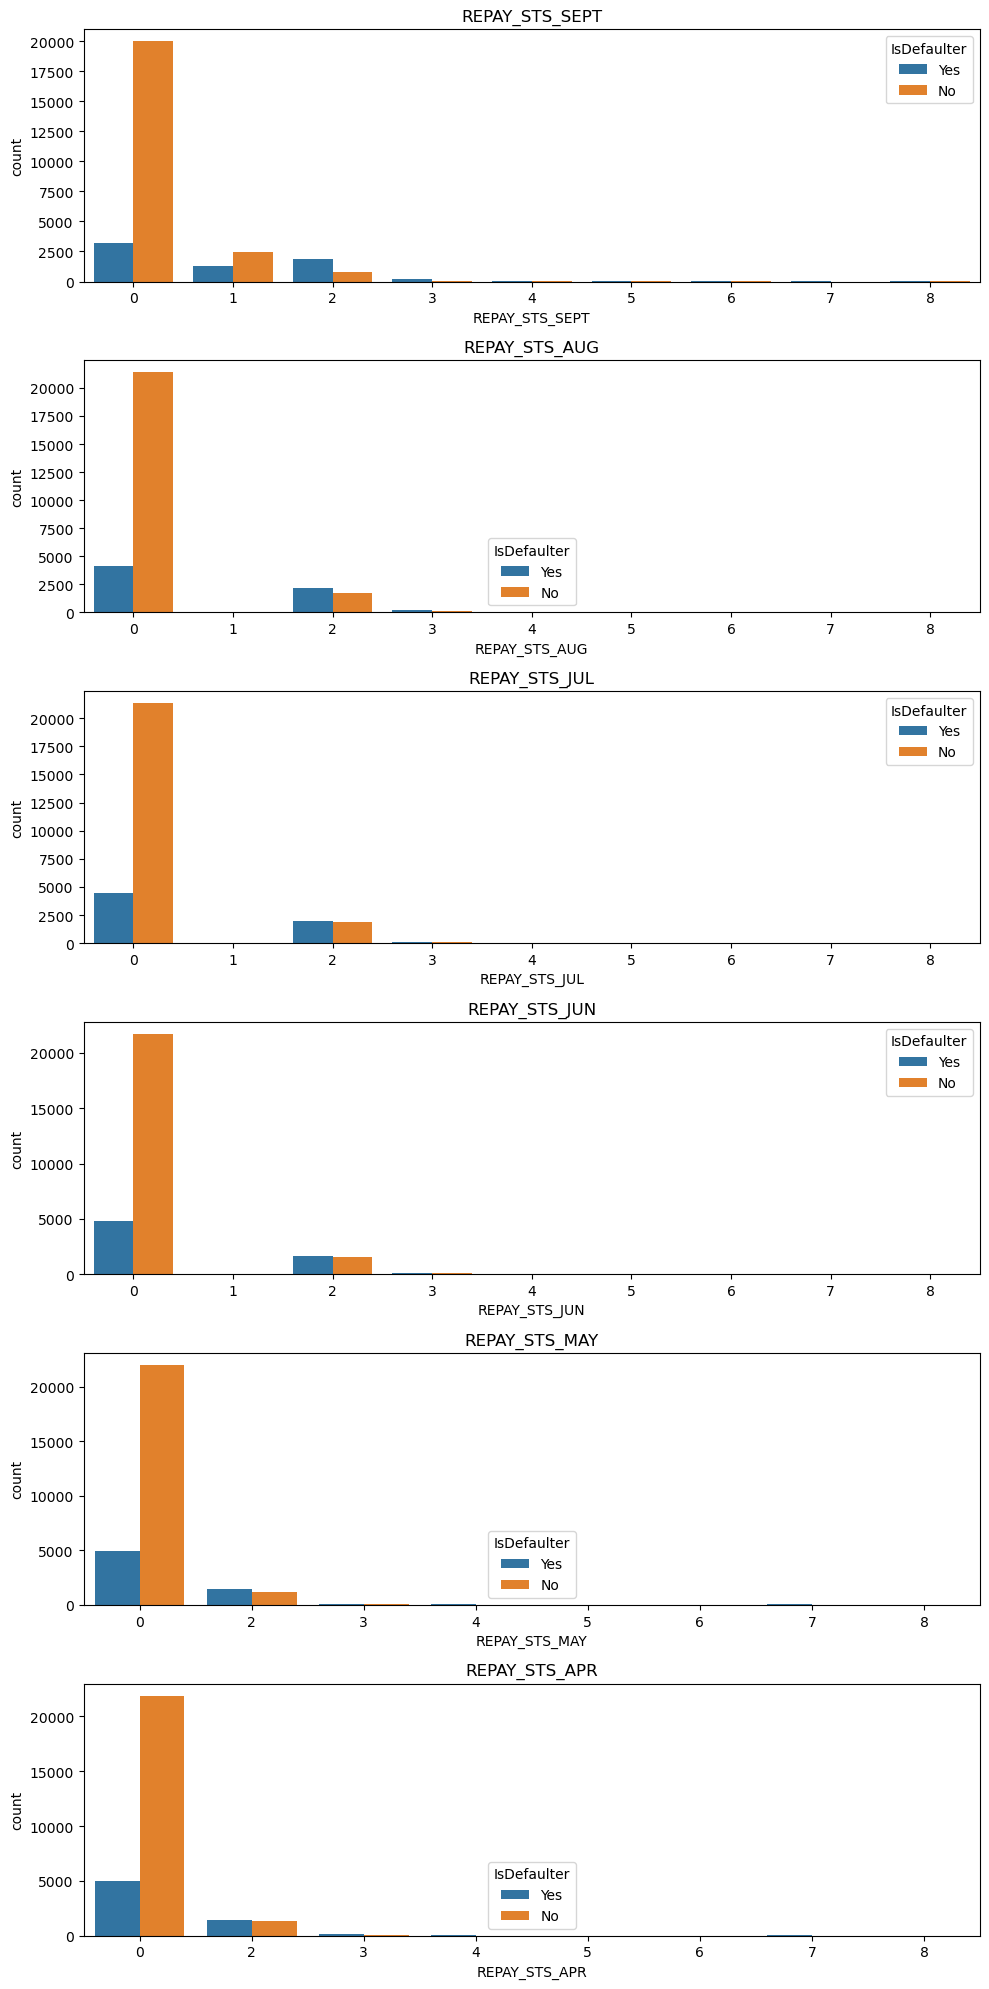

In [31]:
# Chart - 7 visualization code
Repay_col = ['REPAY_STS_SEPT' , 'REPAY_STS_AUG', 'REPAY_STS_JUL', 'REPAY_STS_JUN', 'REPAY_STS_MAY' , 'REPAY_STS_APR']
#plot the uniuvariate distrubtion
fig,ax=plt.subplots(len(Repay_col),1,figsize=(10,20))
for i , col in enumerate(Repay_col):
    sns. countplot ( x=col, hue = 'IsDefaulter', data=credit_df, ax=ax[i])
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

In [32]:
for i in range(0, len(Repay_col)):
    TEST = credit_df.groupby(by=[Repay_col[i], 'IsDefaulter'])
    count_values = TEST['IsDefaulter'].count()
    print(count_values)

REPAY_STS_SEPT  IsDefaulter
0               No             19975
                Yes             3207
1               No              2436
                Yes             1252
2               No               823
                Yes             1844
3               No                78
                Yes              244
4               No                24
                Yes               52
5               No                13
                Yes               13
6               No                 5
                Yes                6
7               No                 2
                Yes                7
8               No                 8
                Yes               11
Name: IsDefaulter, dtype: int64
REPAY_STS_AUG  IsDefaulter
0              No             21402
               Yes             4160
1              No                23
               Yes                5
2              No              1743
               Yes             2184
3              No              

In [33]:
for col in Repay_col:
    # Filter the DataFrame to include only rows where 'IsDefaulter' is 'yes '
    filtered_df = credit_df[credit_df['IsDefaulter'] == 'Yes']
    # Group the filtered DataFrame by the current column and count the 'IsDefaulter' values
    TEST = filtered_df.groupby([col])['IsDefaulter'].count().reset_index(name='NO.of.Defaluters')
    TEST = TEST.sort_values(by='NO.of.Defaluters', ascending=False)
    print(TEST)

   REPAY_STS_SEPT  NO.of.Defaluters
0               0              3207
2               2              1844
1               1              1252
3               3               244
4               4                52
5               5                13
8               8                11
7               7                 7
6               6                 6
   REPAY_STS_AUG  NO.of.Defaluters
0              0              4160
2              2              2184
3              3               201
4              4                50
5              5                15
7              7                12
6              6                 9
1              1                 5
   REPAY_STS_JUL  NO.of.Defaluters
0              0              4434
2              2              1969
3              3               138
4              4                44
7              7                22
6              6                14
5              5                12
8              8                 2
1         

Insight:
> We can see that customers who pay only the minimum amount have a higher risk of default customers in this category also mostly use credit card

> When payment delay is greater than 2 months default ratio is high

Chart 8 - Bill Amount Vs Defaulters

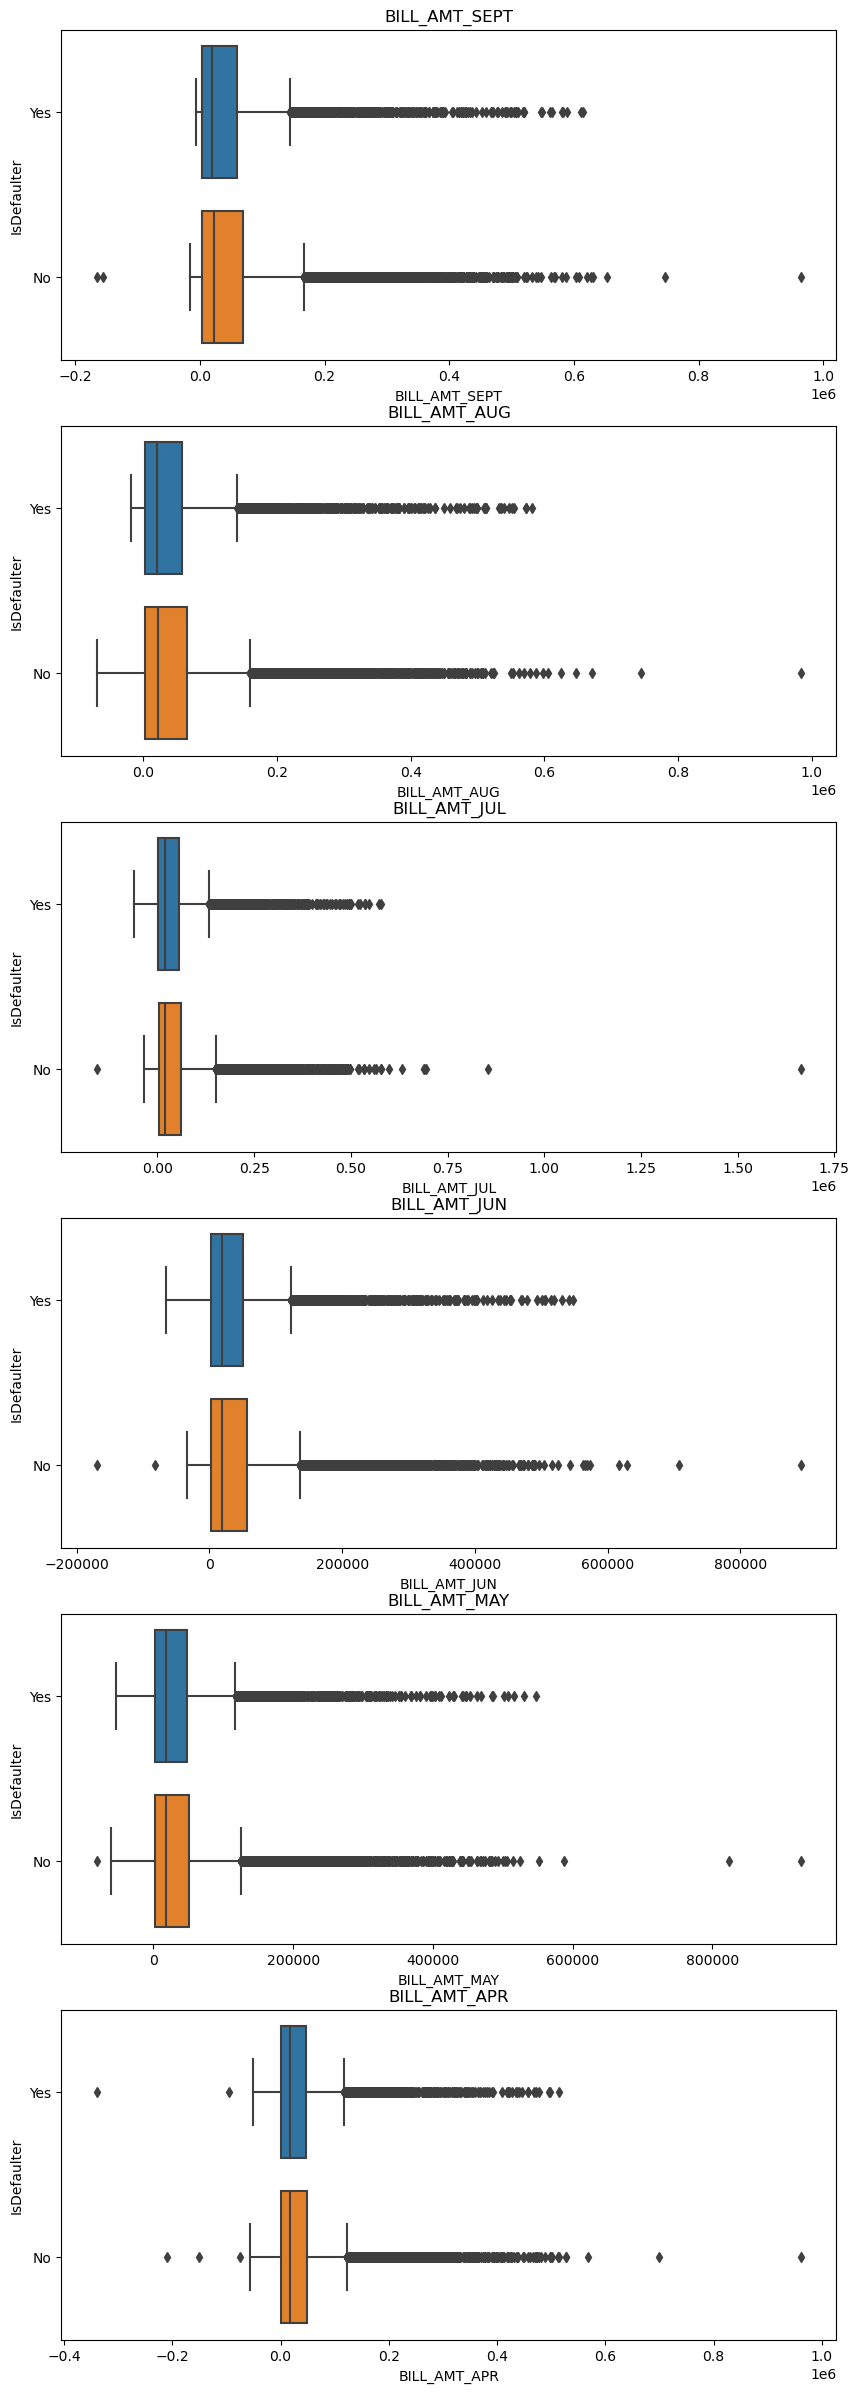

In [34]:
monthlybill_col = ['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']
# Chart - 8 visualization code
fig, ax = plt.subplots(len(monthlybill_col), 1, figsize=(10, 30))
for i, col in enumerate(monthlybill_col):
    # plot the bivariate with isdefaulter
    sns.boxplot(x=col, y='IsDefaulter', data=credit_df, ax=ax[i])
    ax[i].set_title(col)

Why this chart?
> Box plot provide a rapid visual assesment of a dataset's variability. They display the dataset's median, upper and lower qualities, lowest and maximum values, and any outliers in data show errors or uncommon events.

Insight:
> from the plot we can see that distribution of monthly bill has no thick difference between defaulter and non defaulter

Business Impact:
> There are no insight on businessfrom the figures

Chart 9  -Pay Amount vs Bill Amount

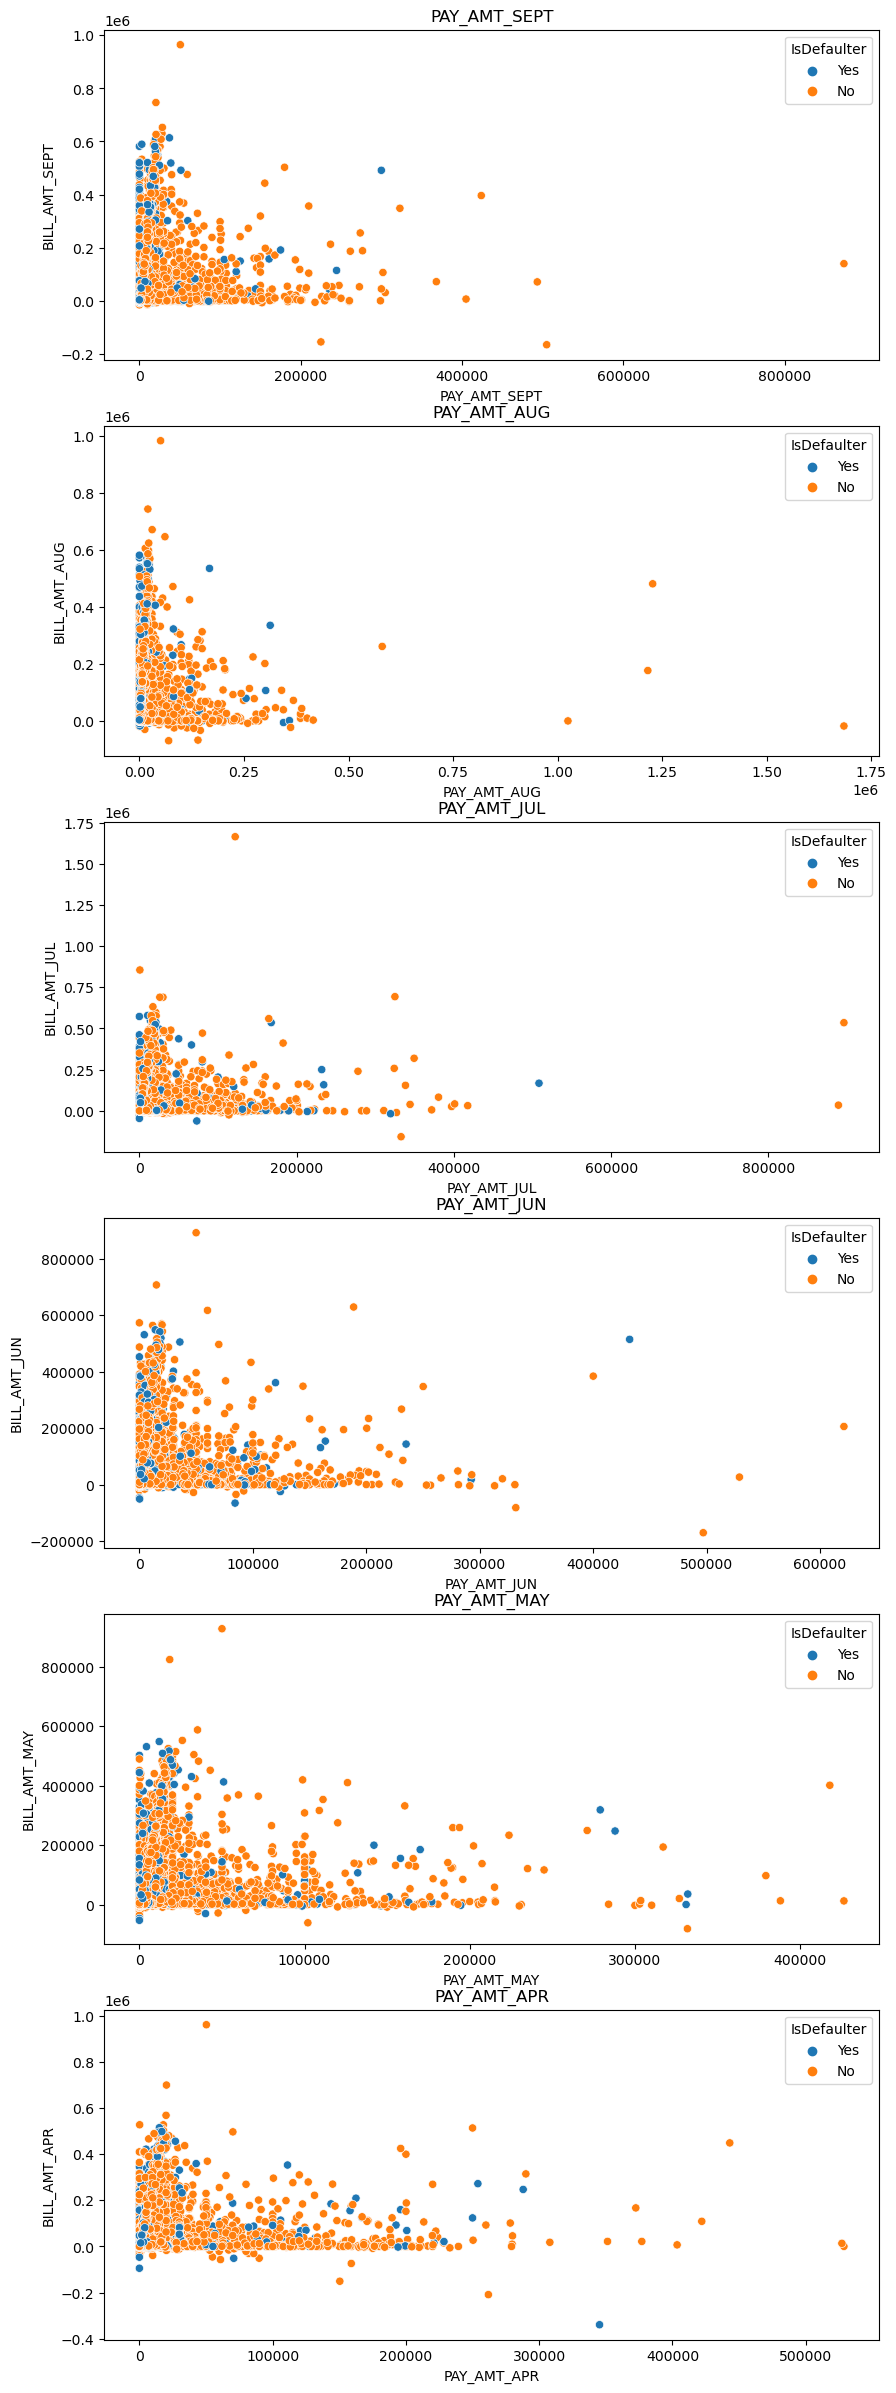

In [35]:
# Chart - 9 visualization code
previous_col = ['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']
# plot the univariate distribution
fig, ax = plt.subplots(len(previous_col), 1, figsize=(10, 30))
for i, col in enumerate(previous_col):
    # plot the bivariate with isdefaulter
    sns.scatterplot(x=col, y=monthlybill_col[i], hue='IsDefaulter', data=credit_df, ax=ax[i])
    ax[i].set_title(col)

Insight:
> When Previous payment is low but monthly bill is high there is high possibility of default the payment

Business Impact:
> When customers is spending exceptionally high according to his payment history company should concerned 

Chart 10 - Corelation Heat Map

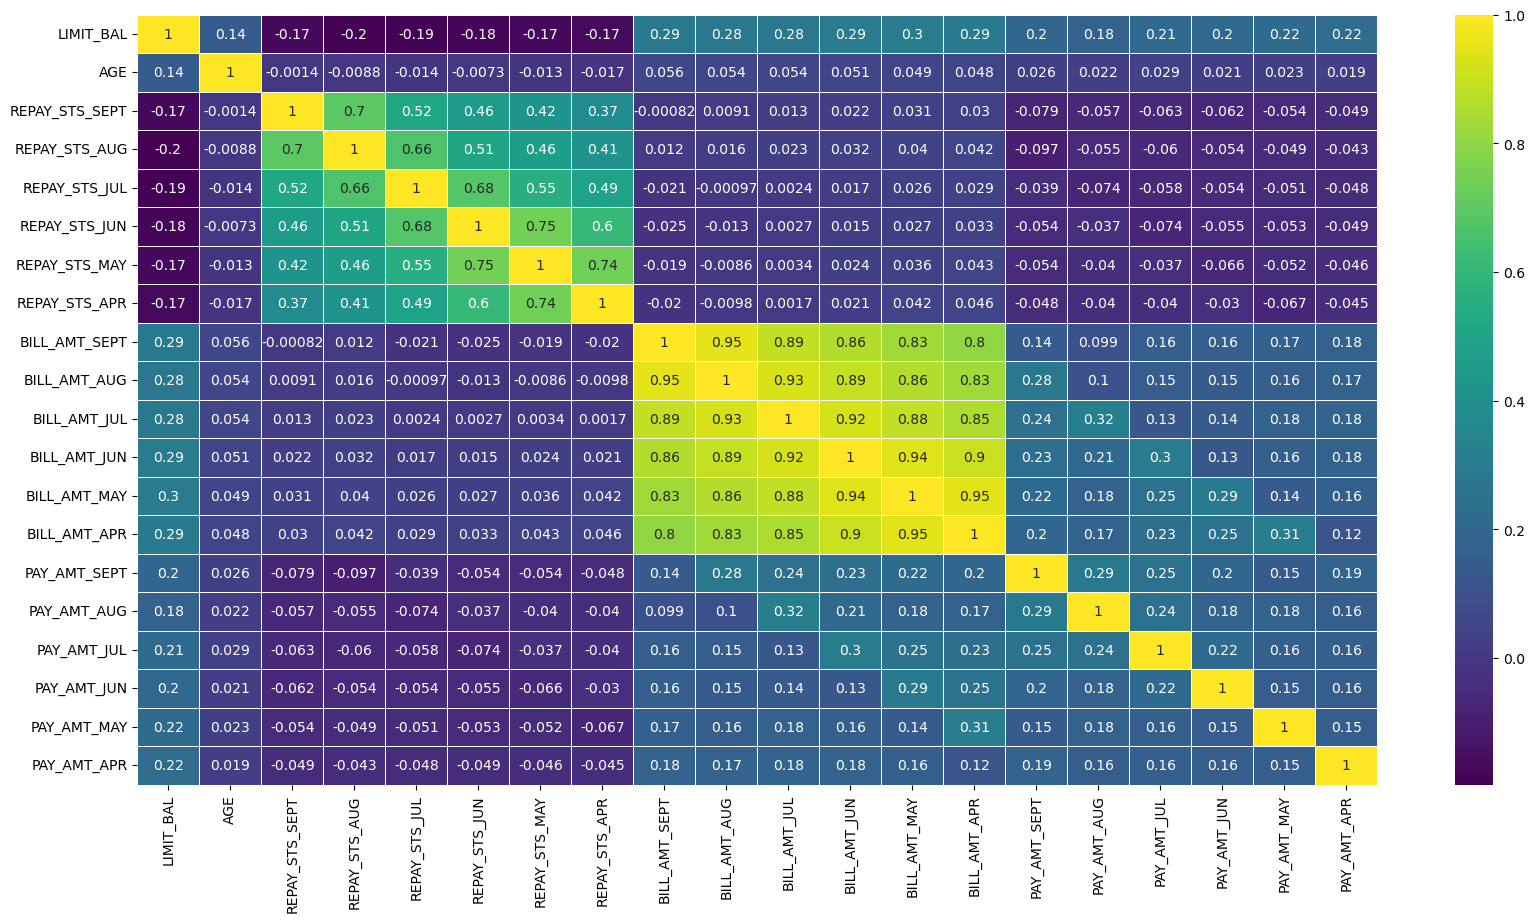

In [36]:
#chart 10 - Visualization code
#Correlation Heatmap visualization code
plt.figure(figsize=(20, 10))
sns.heatmap(credit_df.corr(),linewidths=.5, annot=True, cmap='viridis')
plt.show()

Why this chart?

>Correlation heatmaps are graphical representations of the strength of correlations between numerical data.
Correlation plots are used to determine which variables are related to one another and how strong this relationship is.
A correlation plot often has several numerical variables, each represented by a column. Each row represents the relationship between two variables.
favourable numbers imply a favourable relationship, whereas negative values suggest a negative relationship.


Insight:

>According to the heatmap, some features (for example, PAY_MAY & PAY_APR, BILL_AMT_MAY & BILL_AMT_APR, etc.) are highly associated to each other, but we are not going to eliminate any of them because they contain client transaction details.


#### 5 Hypothesis Testing

Hypothetical Statement 1 : Married male defaults average age is 35 Years.

Null Hypothesis : N = 35

Alternate Hypothesis: N != 35

Test Type: Two Tailed Test

In [37]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value

sample_1=credit_df[(credit_df['MARRIAGE' ]=='Married') & (credit_df['SEX' ]=='Male') & (credit_df['IsDefaulter' ]=='Yes')].sample(1000)
# Getting the required parameter values for hypothesis testing
N=35
sample_mean = sample_1['AGE'].mean()
size = len(sample_1)
# the standard deviation for population
std_pop = credit_df['AGE'].std()
Z_stat = ((sample_mean - N) / (std_pop / np.sqrt(N)))


# calculate the z value
z_value = norm.cdf(Z_stat, 0, 1)

# calculate p value
if z_value > 0.5:
    p_value = 2 * (1 - z_value)
else:
    p_value = 2 * z_value

print(f'P value is {p_value}')

if p_value >= 0.05:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

P value is 9.953881684676702e-06
Reject the null hypothesis


In [38]:
mean_median_difference=sample_1["AGE"].mean()- sample_1["AGE"].median()
print("Mean Median Difference is : ",mean_median_difference)

Mean Median Difference is :  0.8840000000000003


Which statistical test have you done to obtain P-Value?
> I utilized Z-test as a statistical test to produce P-value and discovered that the null hypothesis was rejected and that married male customers defaulting do not have an average age of 35 years

Hypothetical Statement 2

Null Hypothesis : mean = 90000

Alternate Hypothesis: mean != 90000

Test Type: Two Tailed Test

In [39]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
sample_2=credit_df[(credit_df['IsDefaulter']=='Yes')].sample(1000)
# Getting the required parameter values for hypothesis testing
N =90000
sample_mean = sample_2['LIMIT_BAL'].mean()
size = len(sample_2)
# calculate the t_statistic and p_value
t_statistic,P_value=stats.ttest_1samp(sample_2['LIMIT_BAL'],N)
print('T-statistics value', t_statistic)
print("P-Value", P_value)
if P_value >=0.05:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

T-statistics value 10.49656242764944
P-Value 1.6014985926171755e-24
Reject the null hypothesis


Which statistical test have you done to obtain P-value?
> I utilized T-test as a statistical test to generate P-value and discovered that the null hypothesis was rejected the customers that defaulted had not an average credit limit 90000

In [40]:
mean_median_difference=sample_2['LIMIT_BAL'].mean()- sample_2['LIMIT_BAL'].median()
print("Mean Median Difference is : ",mean_median_difference)

Mean Median Difference is :  48040.0


The accompanying figure shows that the median is bigger than the mean over ten. As a result, the distribution is positively biassed. Z-Test cannot be conducted on skewed data.

Even with strongly skewed data, 
t
t-tests and their related confidence intervals can and should be utilised in investigations with a large sample size.

So, with skewed data, we can utilise the T-test to get a better result. As a result, I used the 
t
t - test.

##### Hypothetical Statement 3

1 State your research hypothesis as a null hypothesis and alternate hypothesis

> Null Hypothesis(HO): Defaulter does not depends on Educational qualification

> Alternate Hypothesis(Ha): Defaulter also get affected by educational qualification

2 Perform an appropriate statistical test
>

In [41]:
# Perform Statistical Test to obtain P-Value
#Creating contigency table of EDUCATION AND DEFAULT PAYMENT NEXT MONTH
cont_table=pd.crosstab(credit_df['IsDefaulter'], credit_df['EDUCATION'], margins=False)
#Using Chi-square test to validate Null/Alternate Hypothesis
stat, P_value, dof, expected = chi2_contingency(cont_table)
print("P-value", P_value)
if P_value >=0.05:
    print('Fail to reject the null hypothesis')
else:
    print('Reject the null hypothesis')

P-value 1.495064564810615e-34
Reject the null hypothesis


Which statistical test have you done to obtain P-Value?

>I used chi-square test to generate P_value and discoverd null hypothesis was rejected since defaulter does not depend on educational qualification.

Why did you choose the specific statistical test?

>Here we have to test difference between defaulter and non defaulter with educational qualification.The Chi-Square test is a statistical procedure for determining the difference between observed and expected data.

#### 6. Feature Engineering & Data-Processing

##### 1. Handling Missig Values

In [42]:
#Handling Missing Values & Missing Values Imputation
Nullvalues = credit_df.isnull().sum()
Nullvalues

LIMIT_BAL         0
SEX               0
EDUCATION         0
MARRIAGE          0
AGE               0
REPAY_STS_SEPT    0
REPAY_STS_AUG     0
REPAY_STS_JUL     0
REPAY_STS_JUN     0
REPAY_STS_MAY     0
REPAY_STS_APR     0
BILL_AMT_SEPT     0
BILL_AMT_AUG      0
BILL_AMT_JUL      0
BILL_AMT_JUN      0
BILL_AMT_MAY      0
BILL_AMT_APR      0
PAY_AMT_SEPT      0
PAY_AMT_AUG       0
PAY_AMT_JUL       0
PAY_AMT_JUN       0
PAY_AMT_MAY       0
PAY_AMT_APR       0
IsDefaulter       0
dtype: int64

>No Null Values present in data set

In [43]:
duplicatevalues = credit_df.duplicated()
duplicatevalues

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

> No duplicated values present in the data set

##### 2. Handling Outliers

In [44]:
#Handling outliers & outlier treatments
credit_df.describe()

LIMIT_BAL           AGE  REPAY_STS_SEPT  REPAY_STS_AUG  \
count    30000.000000  30000.000000    30000.000000   30000.000000   
mean    167484.322667     35.485500        0.356767       0.320033   
std     129747.661567      9.217904        0.760594       0.801727   
min      10000.000000     21.000000        0.000000       0.000000   
25%      50000.000000     28.000000        0.000000       0.000000   
50%     140000.000000     34.000000        0.000000       0.000000   
75%     240000.000000     41.000000        0.000000       0.000000   
max    1000000.000000     79.000000        8.000000       8.000000   

       REPAY_STS_JUL  REPAY_STS_JUN  REPAY_STS_MAY  REPAY_STS_APR  \
count   30000.000000   30000.000000    30000.00000   30000.000000   
mean        0.304067       0.258767        0.22150       0.226567   
std         0.790589       0.761113        0.71772       0.715438   
min         0.000000       0.000000        0.00000       0.000000   
25%         0.000000       0.000000        0.00000       0.000000   
50%         0.000000       0.000000        0.00000       0.000000   
75%         0.000000       0.000000        0.00000       0.000000   
max         8.000000       8.000000        8.00000       8.000000   

       BILL_AMT_SEPT   BILL_AMT_AUG  BILL_AMT_JUL   BILL_AMT_JUN  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

        BILL_AMT_MAY   BILL_AMT_APR   PAY_AMT_SEPT   PAY_AMT_AUG  \
count   30000.000000   30000.000000   30000.000000  3.000000e+04   
mean    40311.400967   38871.760400    5663.580500  5.921163e+03   
std     60797.155770   59554.107537   16563.280354  2.304087e+04   
min    -81334.000000 -339603.000000       0.000000  0.000000e+00   
25%      1763.000000    1256.000000    1000.000000  8.330000e+02   
50%     18104.500000   17071.000000    2100.000000  2.009000e+03   
75%     50190.500000   49198.250000    5006.000000  5.000000e+03   
max    927171.000000  961664.000000  873552.000000  1.684259e+06   

        PAY_AMT_JUL    PAY_AMT_JUN    PAY_AMT_MAY    PAY_AMT_APR  
count   30000.00000   30000.000000   30000.000000   30000.000000  
mean     5225.68150    4826.076867    4799.387633    5215.502567  
std     17606.96147   15666.159744   15278.305679   17777.465775  
min         0.00000       0.000000       0.000000       0.000000  
25%       390.00000     296.000000     252.500000     117.750000  
50%      1800.00000    1500.000000    1500.000000    1500.000000  
75%      4505.00000    4013.250000    4031.500000    4000.000000  
max    896040.00000  621000.000000  426529.000000  528666.000000

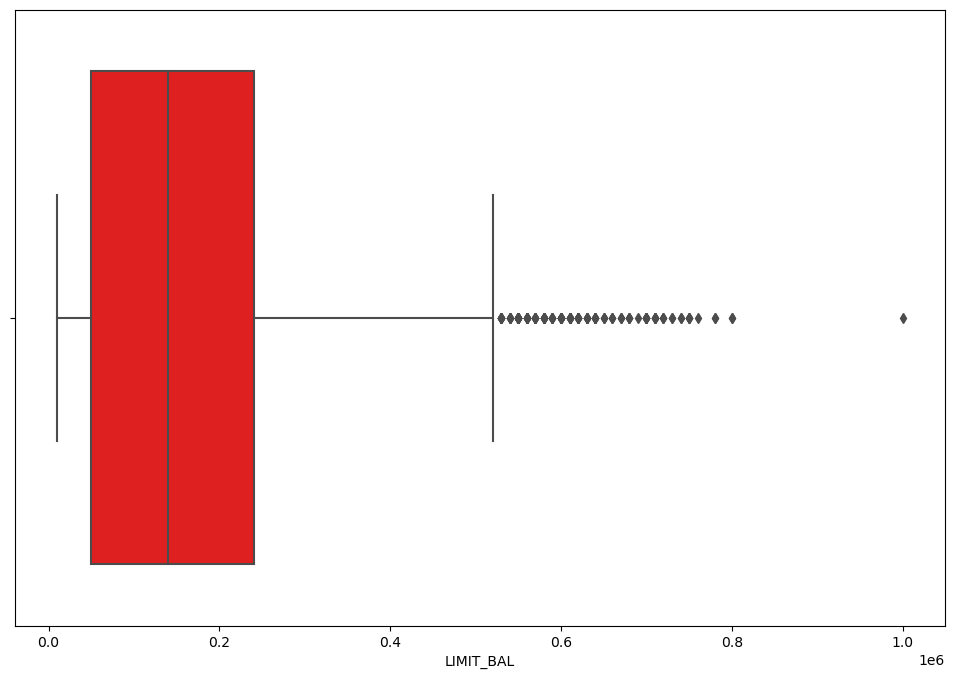

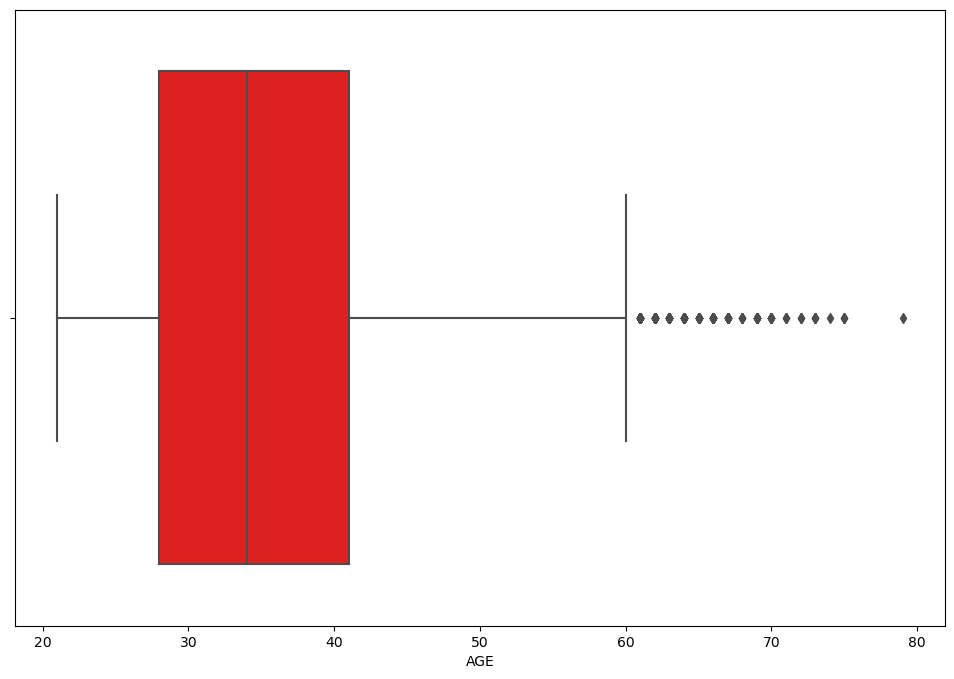

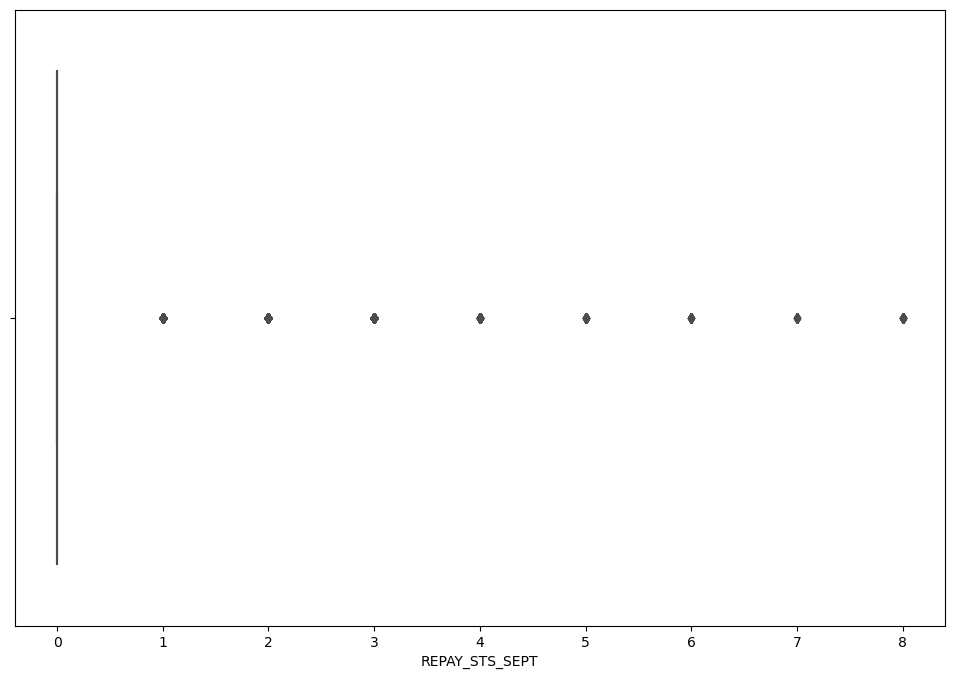

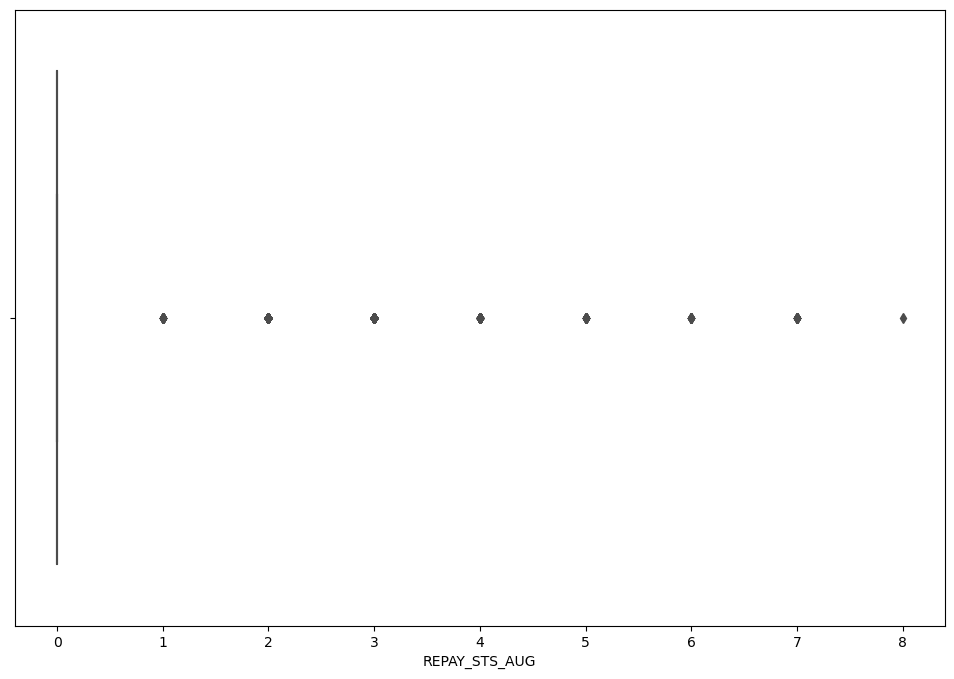

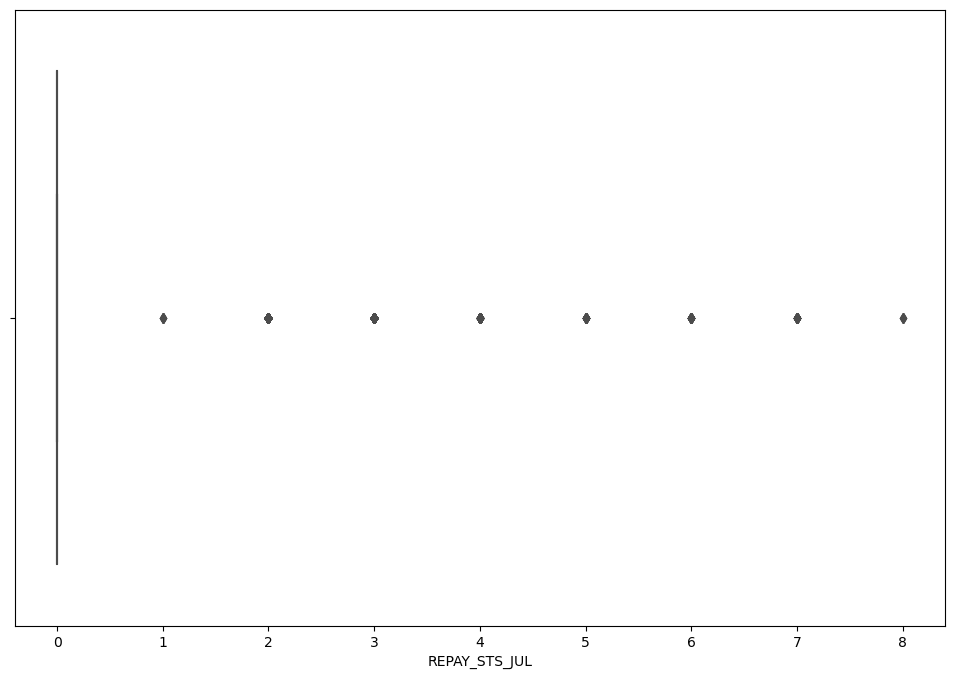

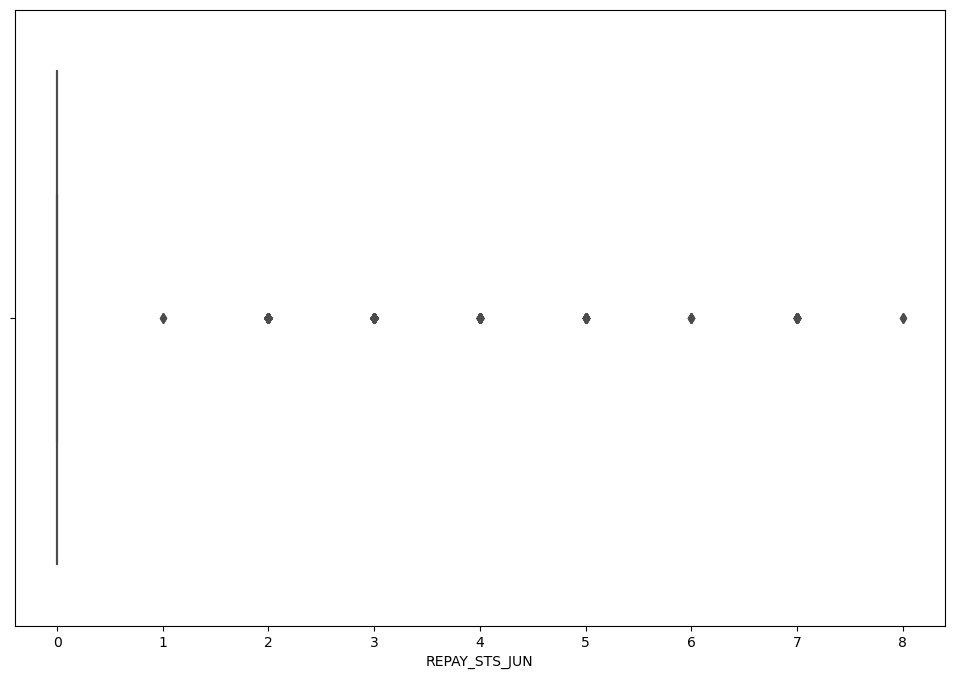

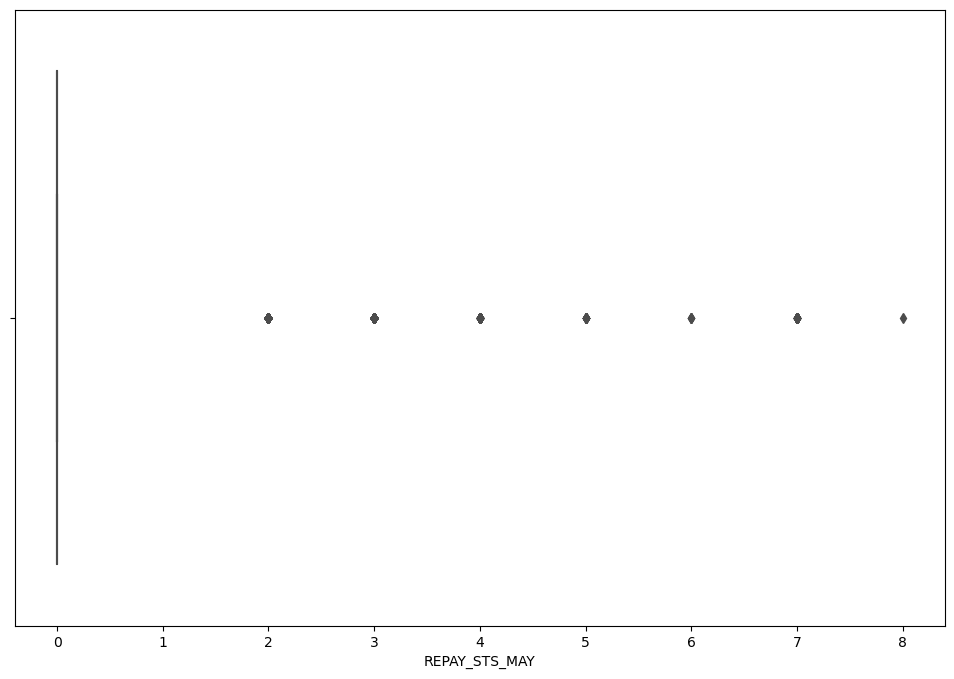

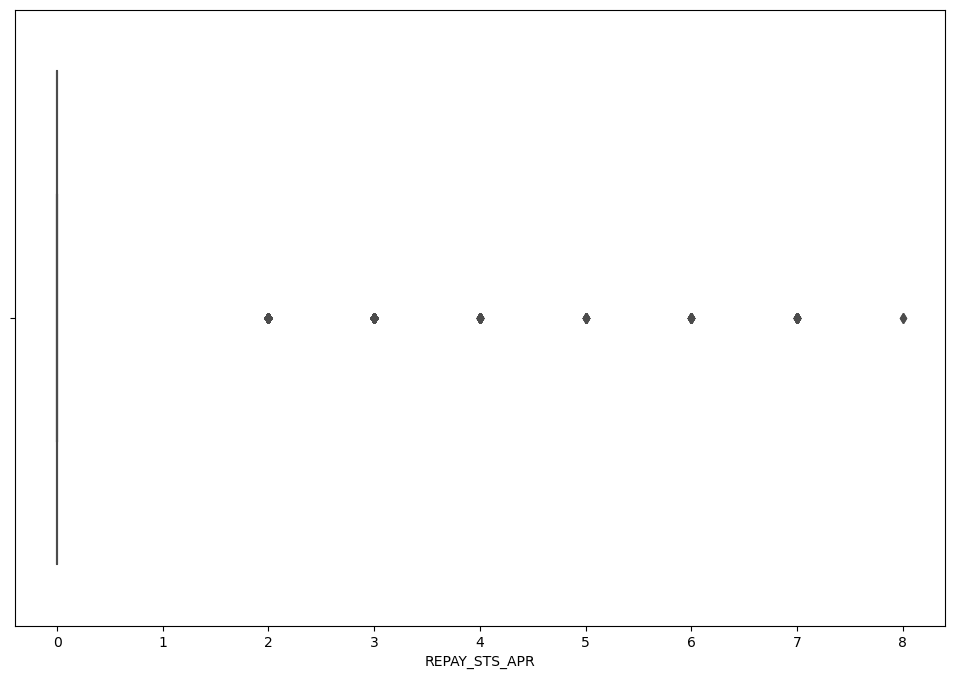

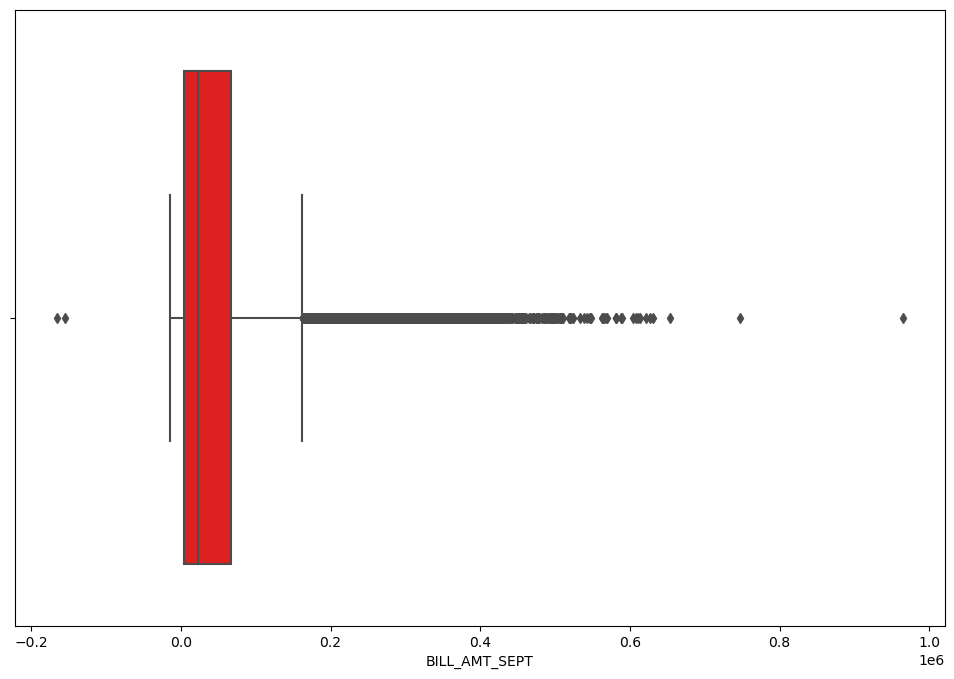

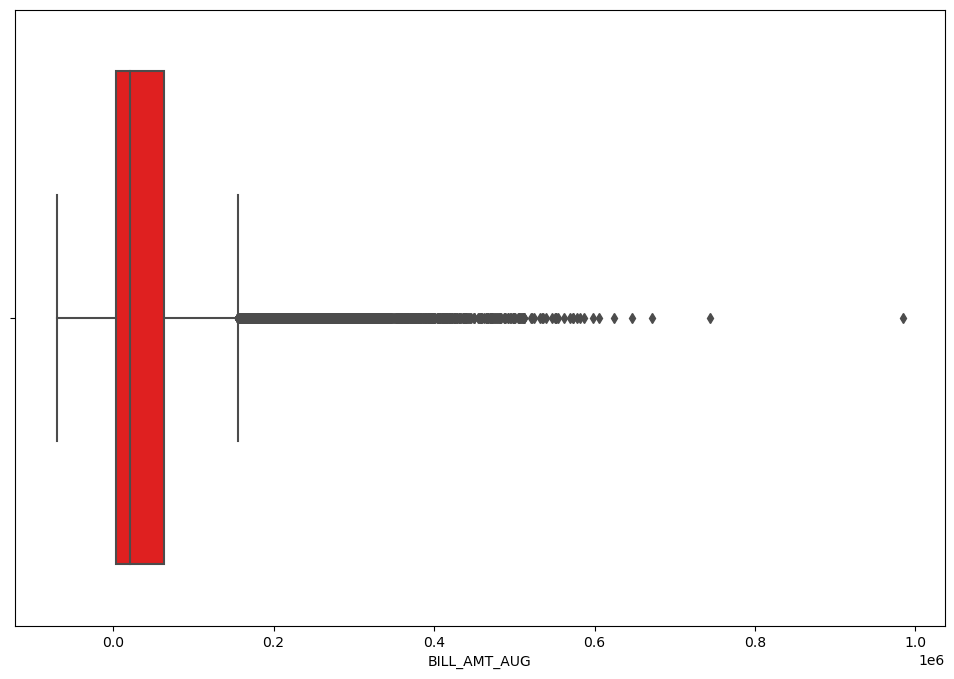

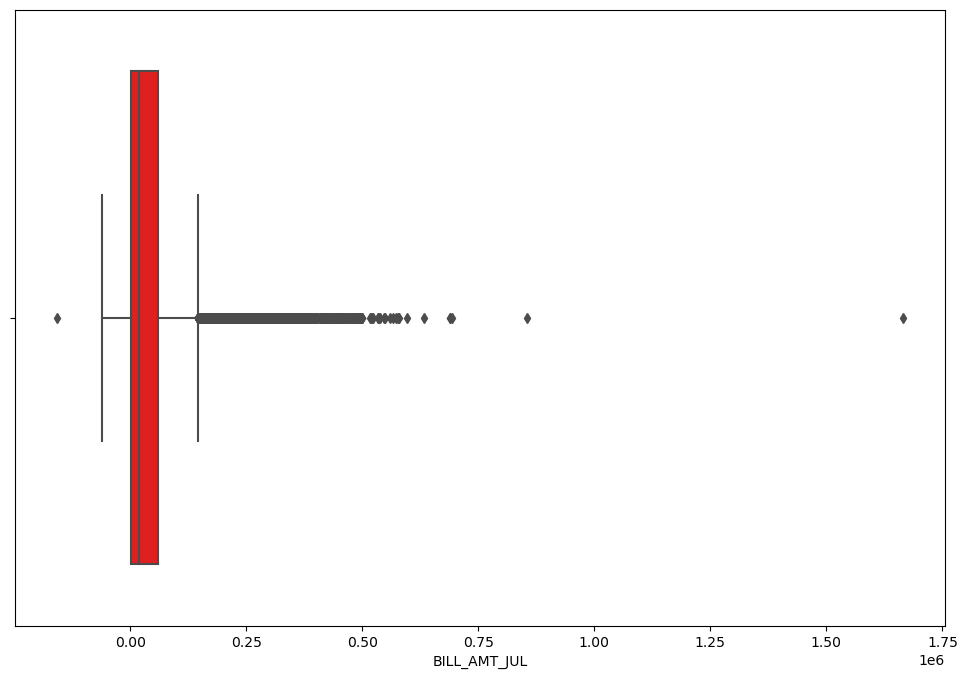

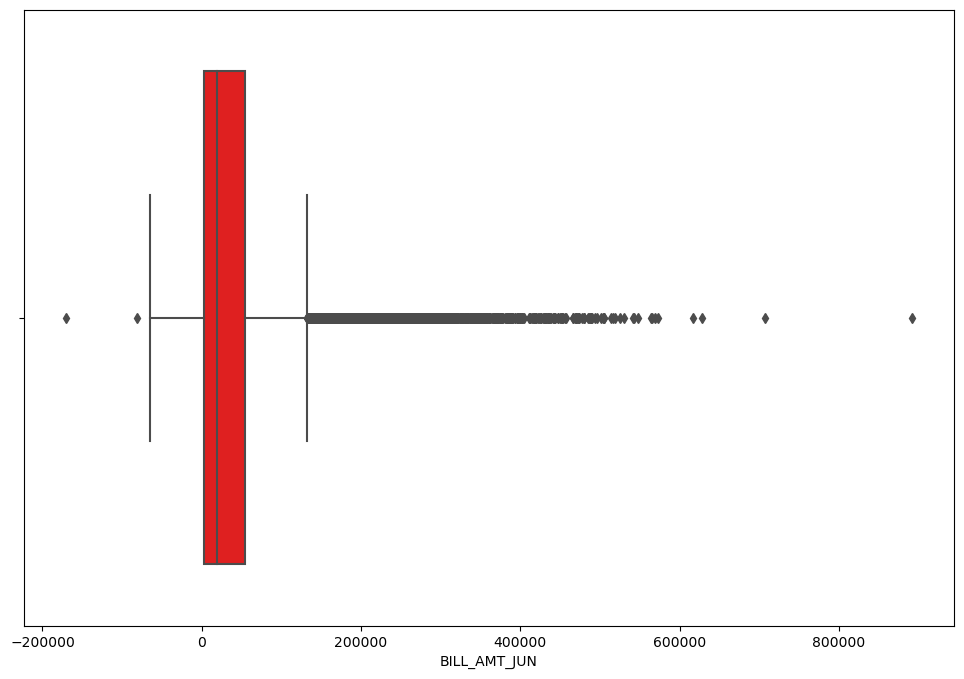

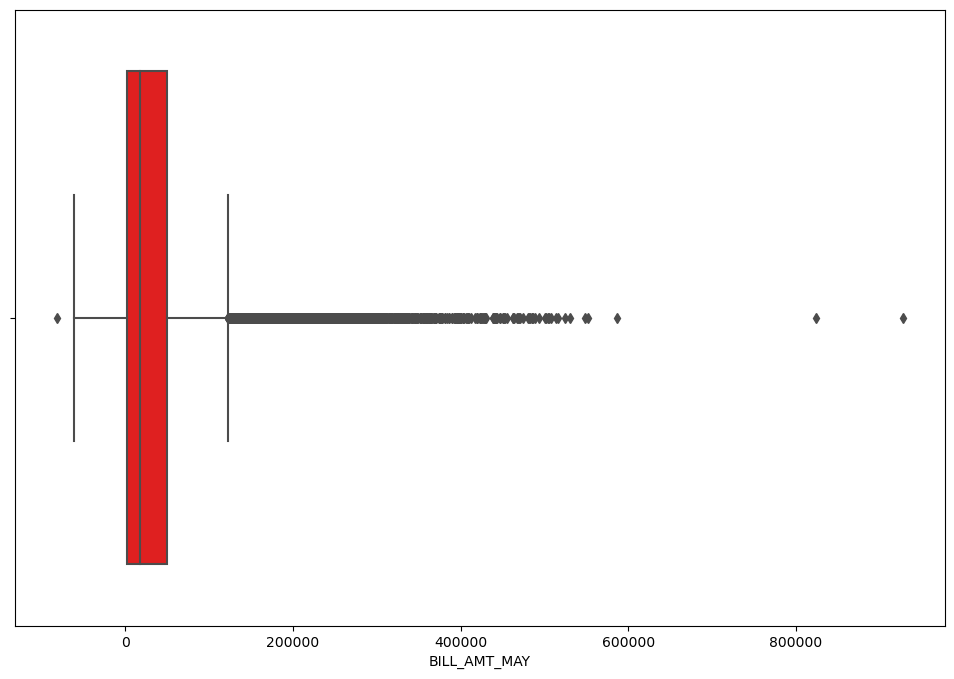

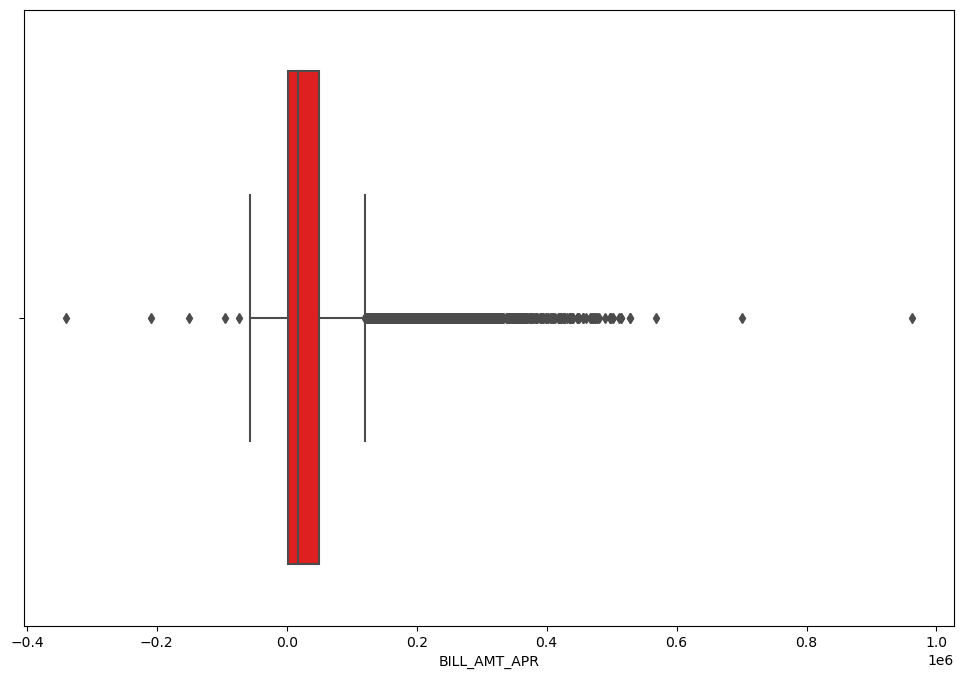

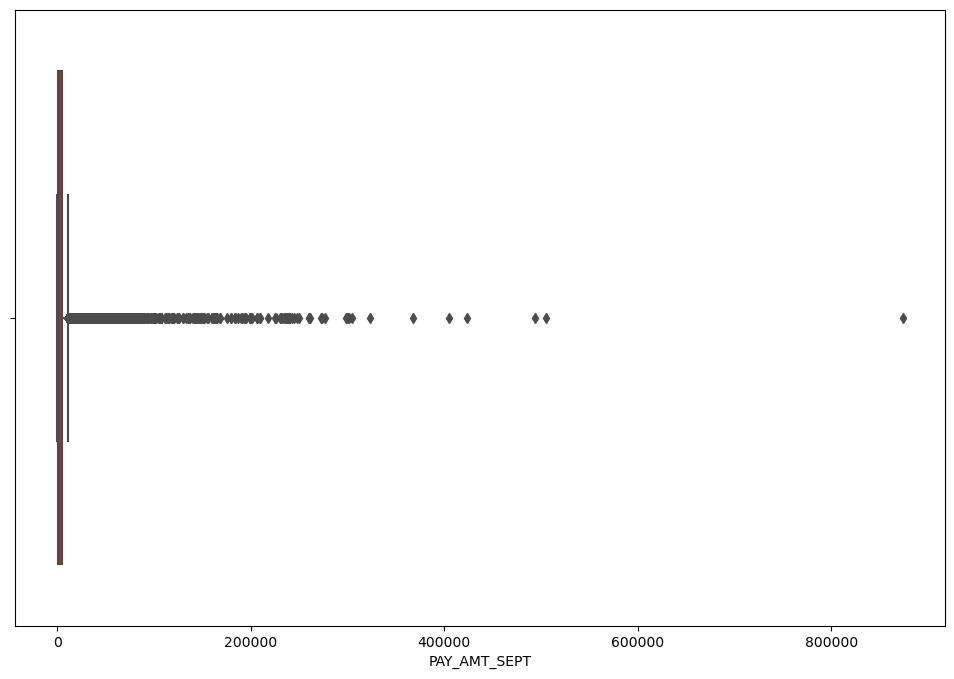

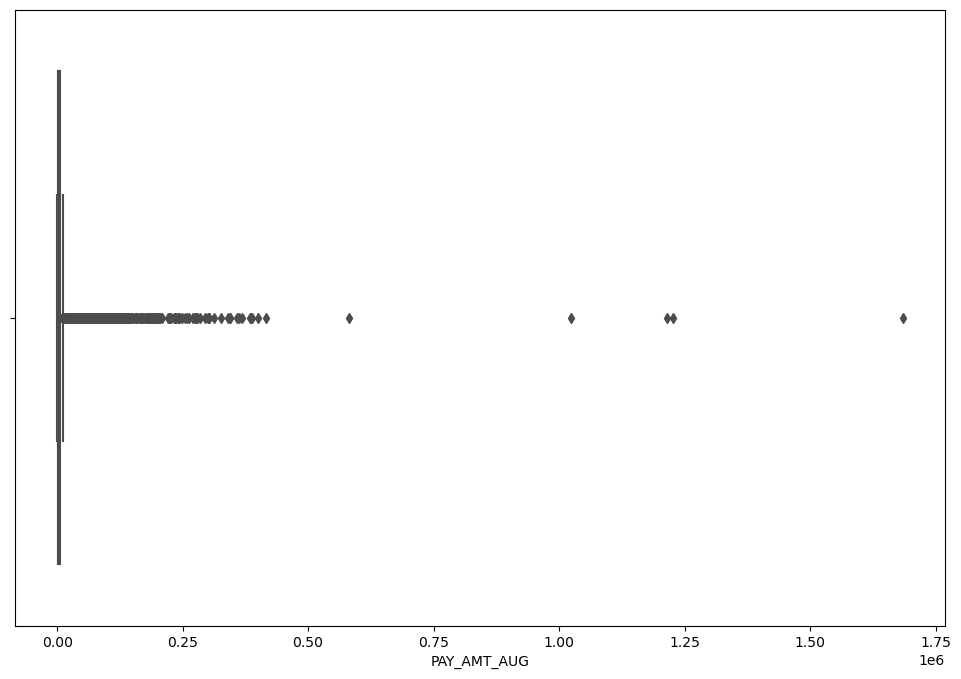

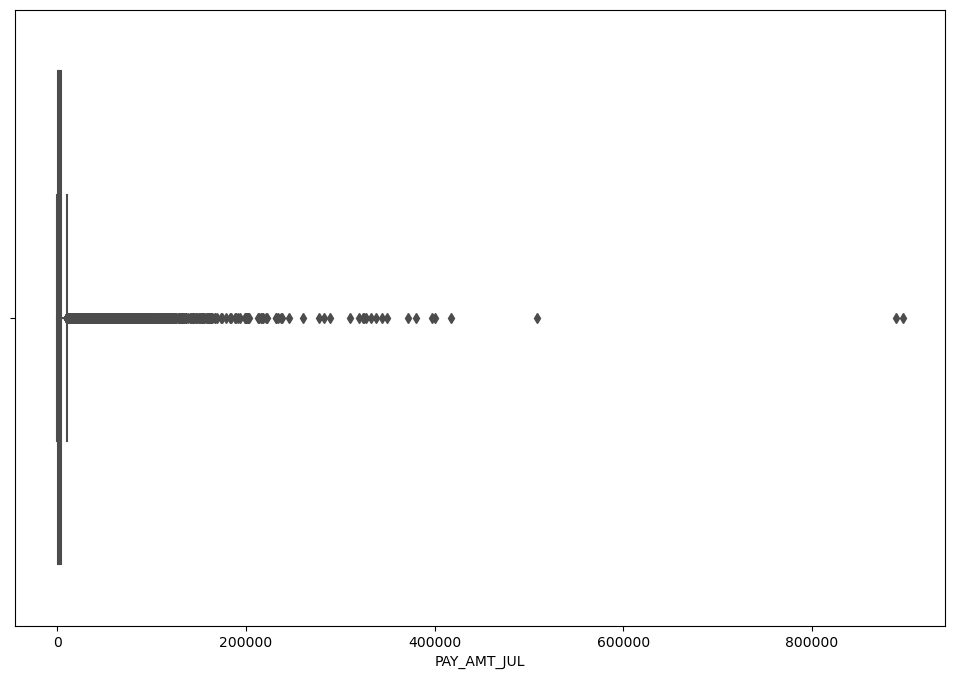

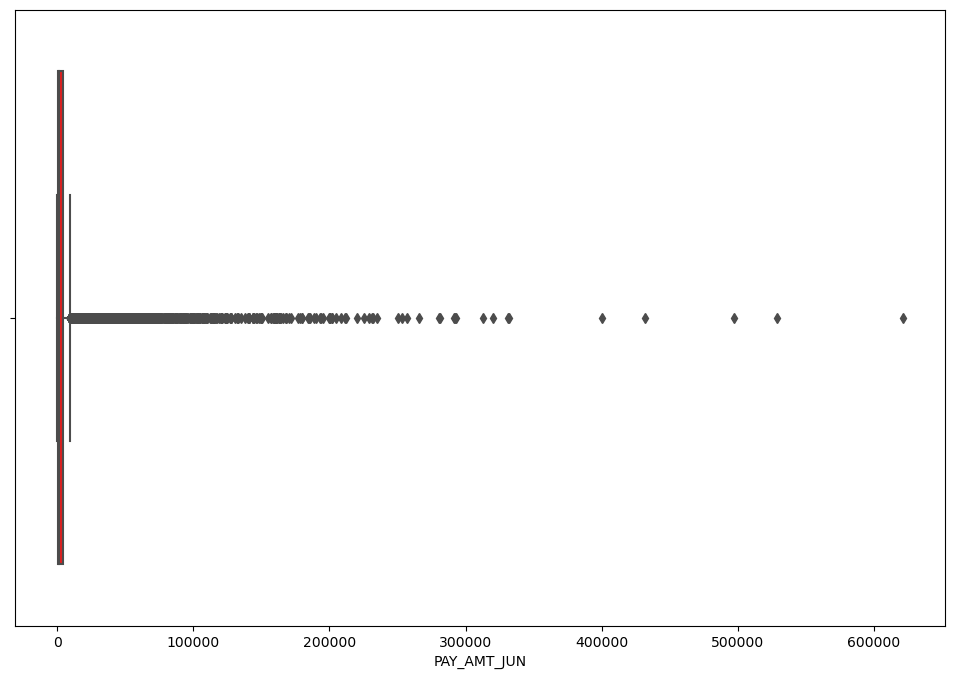

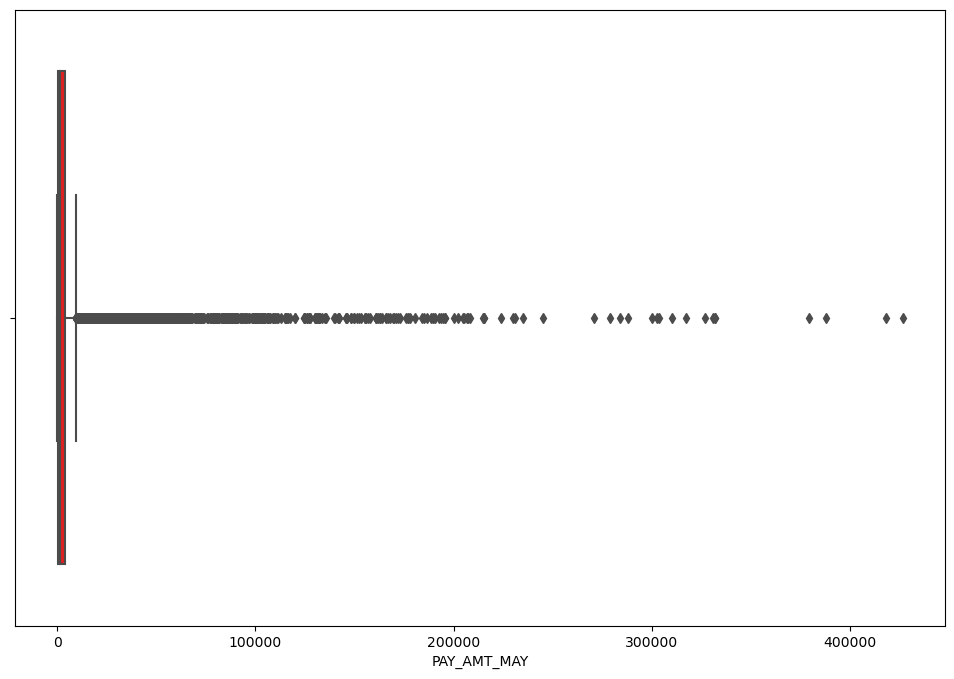

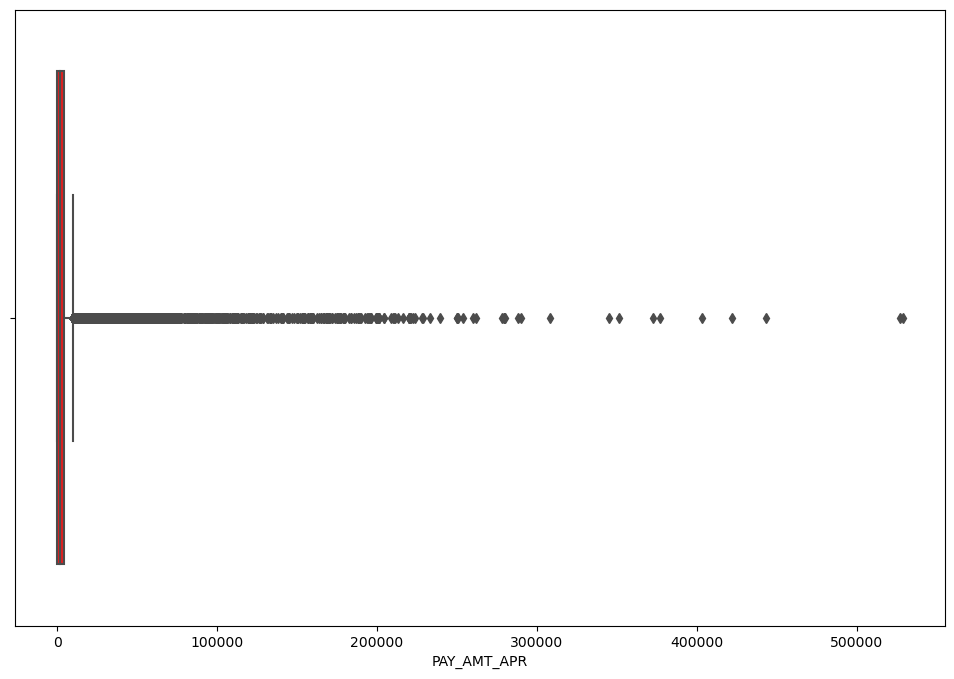

In [45]:
#outlier detection plot
for col in credit_df.describe().columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=credit_df[col], color='r')

What all outlier treatment techniques have you used and why did you use those techniques?
> I used the boxplot to look for outliers in the dataset. Some points appear to be outliers in numeric features that are primarily connected to quantity, and we can use the IQR method to treat these outliers without knowing the exact limit of these columns from the bank, and addressing these outlying amounts will result in data loss.And there is a potential that the amount that was maximal and appeared tdbe an outlier was the true value for that characteristic, thus I did not employ any approaches to treat these outlying numbers.

##### 3. Categorical Encoding


df = credit_df.copy()
df.info() #From imfo we can see that there 3 object type nad reamining are int type we need to change theat type in to int by cateroigal encodig

df.replace({'IsDefaulter ' : {'Yes':1, 'No': 0}}, inplace=True)

#Creating dummies
df=pd.get_dummies (df)
df. head()

In [46]:
df = credit_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LIMIT_BAL       30000 non-null  int64 
 1   SEX             30000 non-null  object
 2   EDUCATION       30000 non-null  object
 3   MARRIAGE        30000 non-null  object
 4   AGE             30000 non-null  int64 
 5   REPAY_STS_SEPT  30000 non-null  int64 
 6   REPAY_STS_AUG   30000 non-null  int64 
 7   REPAY_STS_JUL   30000 non-null  int64 
 8   REPAY_STS_JUN   30000 non-null  int64 
 9   REPAY_STS_MAY   30000 non-null  int64 
 10  REPAY_STS_APR   30000 non-null  int64 
 11  BILL_AMT_SEPT   30000 non-null  int64 
 12  BILL_AMT_AUG    30000 non-null  int64 
 13  BILL_AMT_JUL    30000 non-null  int64 
 14  BILL_AMT_JUN    30000 non-null  int64 
 15  BILL_AMT_MAY    30000 non-null  int64 
 16  BILL_AMT_APR    30000 non-null  int64 
 17  PAY_AMT_SEPT    30000 non-null  int64 
 18  PAY_AM

In [47]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_STS_SEPT',
       'REPAY_STS_AUG', 'REPAY_STS_JUL', 'REPAY_STS_JUN', 'REPAY_STS_MAY',
       'REPAY_STS_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')

In [48]:
credit_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'REPAY_STS_SEPT',
       'REPAY_STS_AUG', 'REPAY_STS_JUL', 'REPAY_STS_JUN', 'REPAY_STS_MAY',
       'REPAY_STS_APR', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL',
       'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR', 'PAY_AMT_SEPT',
       'PAY_AMT_AUG', 'PAY_AMT_JUL', 'PAY_AMT_JUN', 'PAY_AMT_MAY',
       'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')

##### 4. Feature Manipulation & Selection


4.1 Feature Manipulation

In [49]:
#Manipulate Features to minimize feature correlation and create new features

4.2 Feature Selection

In [50]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load your dataset (replace 'credit.csv' with the actual path to your dataset)
data = credit_df

# Assuming your target variable is 'IsDefaulter' and other columns are features
X = data.drop('IsDefaulter', axis=1)
y = data['IsDefaulter']

# Separate numerical and categorical columns
numeric_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing: Scale numerical features and one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

# Apply preprocessing to X
X_scaled = preprocessor.fit_transform(X)

# Initialize the SelectKBest object with chi2 as the scoring function
# You can specify the number of top features you want to select using the 'k' parameter
k_best = SelectKBest(score_func=chi2, k='all')

# Fit the SelectKBest object to your data
k_best.fit(X_scaled, y)

# Get the feature scores
feature_scores = k_best.scores_

# Create a DataFrame to display the feature names and their corresponding Chi-squared scores
all_feature_names = list(numeric_cols) + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
feature_chi2_scores = pd.DataFrame({'Feature': all_feature_names, 'Chi-squared_Score': feature_scores})

# Sort the features by chi-squared score in descending order
feature_chi2_scores = feature_chi2_scores.sort_values(by='Chi-squared_Score', ascending=False)

# Display the top features with their chi-squared scores
print(feature_chi2_scores)


                      Feature  Chi-squared_Score
2              REPAY_STS_SEPT         953.610288
3               REPAY_STS_AUG         805.782247
4               REPAY_STS_JUL         634.908960
5               REPAY_STS_JUN         607.700938
6               REPAY_STS_MAY         593.383490
7               REPAY_STS_APR         506.173542
0                   LIMIT_BAL          76.341829
24           EDUCATION_Others          61.686112
22  EDUCATION_Graduate School          51.149551
21                   SEX_Male          28.922107
23      EDUCATION_High School          26.336315
25       EDUCATION_University          21.237973
20                 SEX_Female          18.983326
26           MARRIAGE_Married          14.486745
28            MARRIAGE_Single          13.159406
18                PAY_AMT_MAY          10.394332
19                PAY_AMT_APR           9.725684
14               PAY_AMT_SEPT           8.847610
17                PAY_AMT_JUN           7.933442
16                PA

In [51]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder

# Load your dataset (replace 'credit.csv' with the actual path to your dataset)
data = df

# Assuming your target variable is 'IsDefaulter' and other columns are features
X = data.drop('IsDefaulter', axis=1)
y = data['IsDefaulter']

# One-hot encode categorical variables
X = pd.get_dummies(X)

# Initialize the SelectKBest object with mutual_info_classif as the scoring function
k_best = SelectKBest(score_func=mutual_info_classif, k='all')

# Fit the SelectKBest object to your data
k_best.fit(X, y)

# Get the feature scores
feature_scores = k_best.scores_

# Create a DataFrame to display the feature names and their corresponding information gain scores
feature_info_gain = pd.DataFrame({'Feature': X.columns, 'Information_Gain': feature_scores })

# Sort the features by information gain in descending order
feature_info_gain = feature_info_gain.sort_values(by='Information_Gain', ascending=False)

#Display the top features with their information gain scores
print(feature_info_gain)

                      Feature  Information_Gain
2              REPAY_STS_SEPT          0.075546
3               REPAY_STS_AUG          0.042527
4               REPAY_STS_JUL          0.035761
5               REPAY_STS_JUN          0.030931
6               REPAY_STS_MAY          0.030359
7               REPAY_STS_APR          0.027707
14               PAY_AMT_SEPT          0.020531
16                PAY_AMT_JUL          0.018094
17                PAY_AMT_JUN          0.017145
0                   LIMIT_BAL          0.016788
15                PAY_AMT_AUG          0.015735
18                PAY_AMT_MAY          0.013298
8               BILL_AMT_SEPT          0.011355
19                PAY_AMT_APR          0.010555
10               BILL_AMT_JUL          0.008844
13               BILL_AMT_APR          0.007274
12               BILL_AMT_MAY          0.006047
9                BILL_AMT_AUG          0.004605
11               BILL_AMT_JUN          0.004046
22  EDUCATION_Graduate School          0

##### 5. Data Transformation

Do you think that your data need to be transformed? If yes, which transformation have you used. Explain why?

In [52]:
# Extracting independent and dependent variables
X = data.drop(labels='IsDefaulter', axis=1)
Y = data['IsDefaulter']

# One-hot encoding categorical variables
X = pd.get_dummies(X)

# Print the shape of X and Y
print(f"The number of rows and columns in X is {X.shape} respectively.")
print(f"The number of rows in Y is {Y.shape}.")

The number of rows and columns in X is (30000, 29) respectively.
The number of rows in Y is (30000,).


##### 6. Data Scaling

In [53]:
# Scaling your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now you can use X_scaled for further processing such as modeling
X_scaled

array([[-1.13672015, -1.24601985,  2.16049607, ...,  1.09377971,
        -0.11281222, -1.06647132],
       [-0.3659805 , -1.02904717, -0.46907093, ..., -0.91426088,
        -0.11281222,  0.93767172],
       [-0.59720239, -0.16115646, -0.46907093, ..., -0.91426088,
        -0.11281222,  0.93767172],
       ...,
       [-1.05964618,  0.16430256,  4.79006307, ..., -0.91426088,
        -0.11281222,  0.93767172],
       [-0.67427636,  0.59824792,  0.84571257, ...,  1.09377971,
        -0.11281222, -1.06647132],
       [-0.90549825,  1.14067961, -0.46907093, ...,  1.09377971,
        -0.11281222, -1.06647132]])

Which method have you used to scale you data and why?
> I've used standard scaler to the data so that its magnitudes are normalized. This could help the learning algorithm and speed up calculations

##### 7. Data Splitting

In [54]:
#Split your data to train and test. Choose splitting ration wisely
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

What data splitting ratio have you used and why?
>I have made the use of 80% and 20% Training and Testing data respectively. The data should be divided in such a way that neither of them is too high, which is more dependent on the ammount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn't really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).

##### 8. Handling Imbalanced Dataset

In [55]:
credit_df['IsDefaulter'].value_counts()

No     23364
Yes     6636
Name: IsDefaulter, dtype: int64

Do you think dataset is imbalaced? Explain why
> Yes, definitely there is class imbalance in the Target variable. However we have already visualized the same in the exploratory data analysis section by using variour charts

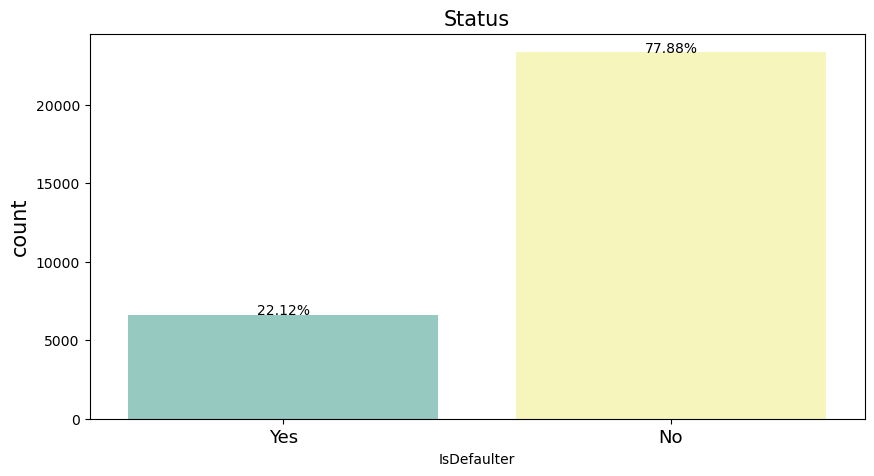

In [56]:
# Handling Imbalanced Dataset (If needed)
# Let's again check the distribution of the target variable
plt.figure(figsize=(10,5))
ax = sns.countplot(data=credit_df, x=credit_df['IsDefaulter'], palette='Set3')
ax.set_title('IsDefaulter vs Non-Defaulter', fontsize=20)
ax.set_title('Status', fontsize=15)
ax.set_ylabel('count', fontsize=15)
ax.set_xticklabels(['Yes', 'No'], fontsize =13)


# adding percentage to the top of each bar
total = float(len(credit_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/total * 100),
            ha="center")

What technique did you use to handle the imbalance dataset and why?
>  As we can see that there is a class imbalance in the dataset so we will tackle the class imbalance using machine learning algorithm

###### 9. ML Model Implementation

ML Model - 1

In [57]:
from sklearn import metrics

# ML model - 1 Implementation
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

#Fit the Algorithm
knn.fit(X_train, Y_train)

# Predict on the model
knn_y_pred_train = knn.predict(X_train)
knn_tree_y_pred_test = knn.predict(X_test)

In [58]:
print('Untuned K Nearest Neighbors Model')
print("Training F1 Score: ", metrics.f1_score(Y_train, knn_y_pred_train, pos_label='Yes'))
print("Testing F1 Score: ", metrics.f1_score(Y_test, knn_tree_y_pred_test, pos_label='Yes'))

Untuned K Nearest Neighbors Model
Training F1 Score:  0.9987773911407881
Testing F1 Score:  0.2494908350305499


In [59]:
t1_knn = metrics.f1_score(Y_train, knn_y_pred_train, pos_label='Yes')
t2_knn = metrics.f1_score(Y_test, knn_tree_y_pred_test, pos_label='Yes')

1. Explain the ML model used and it's performance using Evaluation metric Score Chart

In [60]:
#Visualizing evaluation Metric Score Chart
metric_dict = {}
metric_dict['without cross KNN'] = {'Training F1':t1_knn, 'Testing F1': t2_knn}

2. Cross-Validation & Hyperparameter Tuning

In [61]:
from sklearn.model_selection import GridSearchCV
#ML model - Implementation with hyperparameter optimization techniques (i.e GridSearch CV, Randomsearch CV, Bayesian )
k_near = KNeighborsClassifier(weights='distance')
#Fit the Algorithm
k_param_dict = {'n_neighbors': range(4, 15, 1)}
grid_k_neighbors = GridSearchCV(k_near, k_param_dict, cv=5, scoring='f1', verbose=1)
grid_k_neighbors.fit(X_train, Y_train)
#Predict on the model
print('F1 Score:', grid_k_neighbors.best_score_)
print('Best Herperparameters:', grid_k_neighbors.best_params_)
print('Model object with best parameters: ')
print(grid_k_neighbors.best_estimator_)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
F1 Score: nan
Best Herperparameters: {'n_neighbors': 4}
Model object with best parameters: 
KNeighborsClassifier(n_neighbors=4, weights='distance')


In [62]:
#Predicting the response on both train and test data set respectively 
tuned_k_neighbors_y_pred_train = grid_k_neighbors.best_estimator_.predict(X_train)
tuned_k_neighbors_y_pred_test = grid_k_neighbors.best_estimator_.predict(X_test)

# Calculate F1 score for train and test sets
print('Tuned K Nearest Neighbors Predictions')
print('F1 on train set:', metrics.f1_score(Y_train, tuned_k_neighbors_y_pred_train, pos_label='Yes'))
print('F1 on test set:', metrics.f1_score(Y_test, tuned_k_neighbors_y_pred_test, pos_label='Yes'))

Tuned K Nearest Neighbors Predictions
F1 on train set: 0.9987773911407881
F1 on test set: 0.27683873915029694


In [63]:
train_tuned_knn = metrics.f1_score(Y_train, tuned_k_neighbors_y_pred_train, pos_label='Yes')
test_tuned_knn =  metrics.f1_score(Y_test, tuned_k_neighbors_y_pred_test, pos_label='Yes')

In [64]:
metric_dict = {}
metric_dict['Tuned KNN'] = {'Training F1':train_tuned_knn, 'Testing F1':test_tuned_knn}

In [65]:
metric_dict['Tuned KNN']

{'Training F1': 0.9987773911407881, 'Testing F1': 0.27683873915029694}

Which Hyperparameter optimization technique have you used and why?
> Since hyperparameter values are predefined so here grid search technique has been used to tune the hyper parameter.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart
> Yes, there is a slight improvement in the F1 score evaluation matrics. But it is very much clear that the above model is definitely not suitable for the predicting the default as the high evaluation metric F1 score in the train data indicates that the model has overfit in the data set.

ML Model - 2

###### Logistic Regression

Explain the ML Model used and it's performance using Evaluation metric Score chart.

In [66]:
logreg = LogisticRegression(C=1e9, class_weight='balanced')
logreg.fit(X_train, Y_train)
logreg_y_pred_train = logreg.predict(X_train)
logreg_y_pred_test = logreg.predict(X_test)

In [67]:
print('Untuned Logistic Regression Model')
print('Training F1 Score: ', metrics.f1_score(Y_train, logreg_y_pred_train, pos_label='Yes'))
print('Testing F1 Score: ', metrics.f1_score(Y_test, logreg_y_pred_test, pos_label='Yes'))

Untuned Logistic Regression Model
Training F1 Score:  0.398454825094785
Testing F1 Score:  0.38547326279668287


In [68]:
t1_log_reg = metrics.f1_score(Y_train, logreg_y_pred_train, pos_label='Yes')
t2_log_reg = metrics.f1_score(Y_test, logreg_y_pred_test, pos_label='Yes')

In [69]:
#Visualizing Evaluation Metric Score Chart
metric_dict['without cross Logistic Regression'] = {'Training F1': t1_log_reg, 'Testing F1':t2_log_reg}

In [70]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

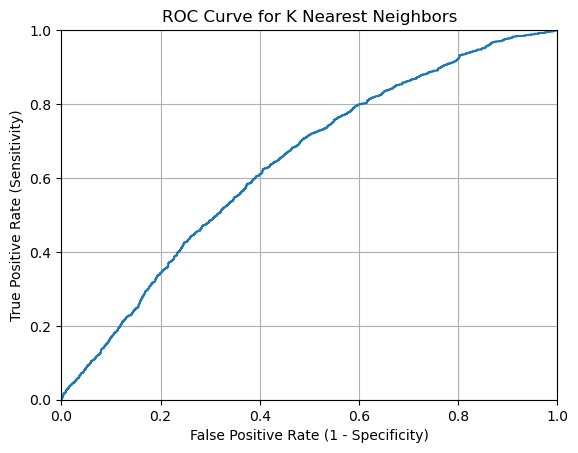

In [71]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob, pos_label='Yes')

# Plot ROC Curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for K Nearest Neighbors')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [72]:
print(metrics.roc_auc_score(Y_test, y_pred_prob))

0.6385903808414355


In [73]:
print("Accuracy:", metrics.accuracy_score(Y_test, logreg_y_pred_test))
print('Precision:', metrics.precision_score(Y_test, logreg_y_pred_test, pos_label='Yes'))
print('Recall:', metrics.recall_score(Y_test, logreg_y_pred_test, pos_label='Yes'))
print('F1 Score:', metrics.f1_score(Y_test, logreg_y_pred_test, pos_label='Yes'))

Accuracy: 0.6418333333333334
Precision: 0.3086080586080586
Recall: 0.5133282559025133
F1 Score: 0.38547326279668287


[[12806  5871]
 [ 2538  2785]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'default')]

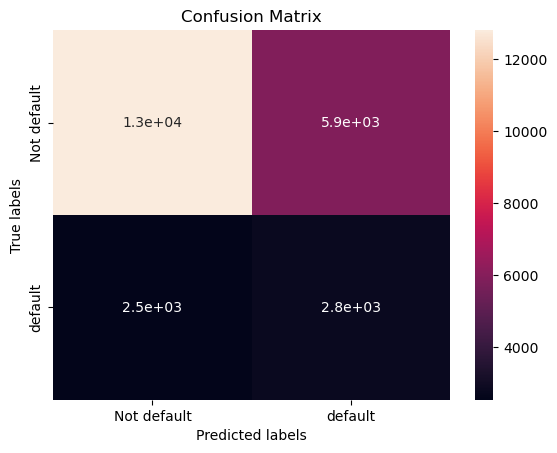

In [74]:
#confuse matrix
from sklearn.metrics import confusion_matrix

labels = ['Not default', 'default']
cm = confusion_matrix(Y_train, logreg_y_pred_train)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax) #annot=True to annotate cells

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[3177 1510]
 [ 639  674]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'Default')]

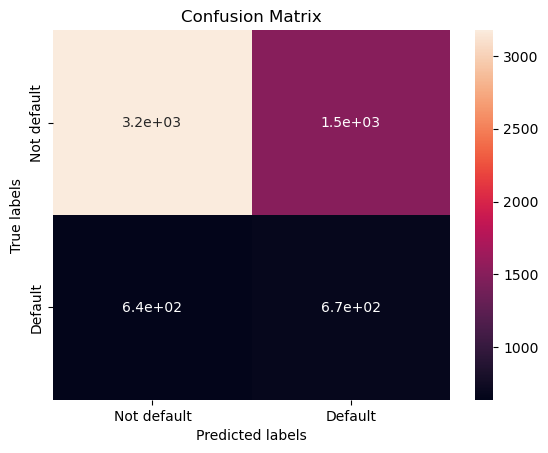

In [75]:

labels = ['Not default', 'Default']
cm = confusion_matrix(Y_test, logreg_y_pred_test)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax) #annot=True to annotate cells

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Cross Validation & Hyperparameter Tuning

In [76]:
#ML Model -1 Implementation with hyperparameter optimization techniques (i.e GridSearch CV, Randomsearch CV, Bayesian Optimization etc.)
tuned_log = LogisticRegression(random_state=42, class_weight='balanced', solver='lbfgs')  
# Fit the Algorithm  
log_param_dict = {'C': range(3, 7, 1), 'penalty': ['l2']} 
grid_log = GridSearchCV(tuned_log, log_param_dict, cv=5, scoring='f1', verbose=1)  
grid_log.fit(X_train, Y_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=42),
             param_grid={'C': range(3, 7), 'penalty': ['l2']}, scoring='f1',
             verbose=1)

In [77]:
print('F1 Score: ', grid_log.best_score_)
print('Best Hyperparameters:', grid_log.best_params_)
print('Model object with best parameters: ')
print(grid_log.best_estimator_)

F1 Score:  nan
Best Hyperparameters: {'C': 3, 'penalty': 'l2'}
Model object with best parameters: 
LogisticRegression(C=3, class_weight='balanced', random_state=42)


In [78]:
grid_log_y_pred_train = grid_log.best_estimator_.predict(X_train)
grid_log_y_pred_test = grid_log.best_estimator_.predict(X_test)

In [79]:
print("Tuned Logistic Regression Model Prediction")
print("F1 on train set: ", metrics.f1_score(Y_train, grid_log_y_pred_train, pos_label='Yes'))
print("F1 on test set: ", metrics.f1_score(Y_test, grid_log_y_pred_test, pos_label='Yes'))

Tuned Logistic Regression Model Prediction
F1 on train set:  0.393684521174561
F1 on test set:  0.3854566952409104


In [80]:
train_tuned_log_reg = metrics.f1_score(Y_train, grid_log_y_pred_train, pos_label='Yes')
test_tuned_log_reg = metrics.f1_score(Y_test, grid_log_y_pred_test, pos_label='Yes')

In [81]:
metric_dict['Tuned Logistic Regression'] = {'Training F1': train_tuned_log_reg, 'Testing F1':test_tuned_log_reg}

In [82]:
metric_dict['Tuned Logistic Regression']

{'Training F1': 0.393684521174561, 'Testing F1': 0.3854566952409104}

[[3269 1418]
 [ 661  652]]


[Text(0.5, 0, 'Not deault'), Text(1.5, 0, 'default')]

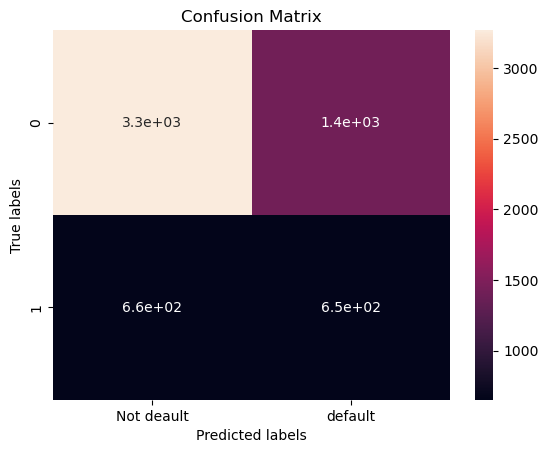

In [83]:
labels = ['Not deault', 'default']
cm = confusion_matrix(Y_test, grid_log_y_pred_test)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot = True to annotate cells

#label, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)

In [84]:
y_pred_prob_1 = grid_log.predict_proba(X_test)[:, 1]

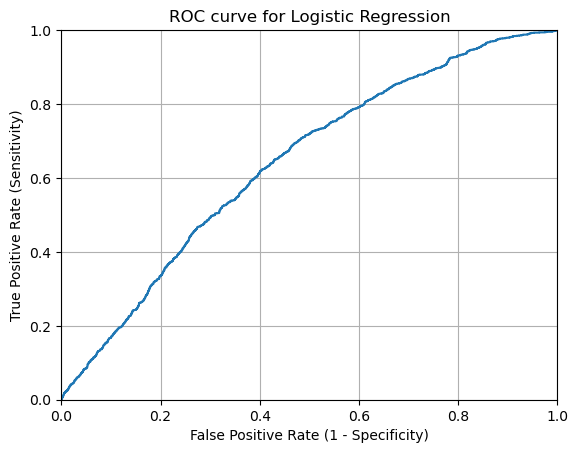

In [85]:
#ROC Curve Graph
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob_1, pos_label='Yes')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [86]:
print(metrics.roc_auc_score(Y_test, y_pred_prob_1))

0.6405934581740002


Which hyperparameter optimization technique have you used and why?
>Grid search CV technique has been issued for hyperparameter tuning.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart
> There is not much improvement noticed even after applying grid search CV. F1 score and roc_suc score remains same for both the cases.

ML - Model 3

###### Decision Tree

In [87]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [88]:
#predicting the model
tree_y_pred_train = tree.predict(X_train)
tree_y_pred_test = tree.predict(X_test)

In [89]:
print('Untuned Decision Tree Model')
print('Training F1 Score: ', metrics.f1_score(Y_train, tree_y_pred_train, pos_label='Yes'))
print('Testing F1 Score: ', metrics.f1_score(Y_test, tree_y_pred_test,pos_label='Yes'))

Untuned Decision Tree Model
Training F1 Score:  0.9987773911407881
Testing F1 Score:  0.39163916391639164


1. Explain the ML Model used and its performance using Evaluation metric Score Chart

In [90]:
t1_tree = metrics.f1_score(Y_train, tree_y_pred_train, pos_label='Yes')
t2_tree = metrics.f1_score(Y_test, tree_y_pred_test, pos_label='Yes')

In [91]:
metric_dict['without corss Decision Tree'] = {'Training F1':t1_tree, 'Testing F1': t2_tree}

2. Cross Validation & Hyperparameter Tuning

In [92]:
#ML model - 3 Implementation with hyperparameter optimization techniques(i.e GridSearch CV, Randomsearch CV, Bayesian Optimization etc.)
decision_tree = DecisionTreeClassifier(random_state=3, criterion='gini')
param_dict = {'max_depth': range(2, 15, 1),
                  'max_leaf_nodes': range(2, 30, 2),
              'min_samples_split': range(2, 4, 1)}
grid_tree = GridSearchCV(decision_tree, param_dict, cv=5, scoring='f1', verbose=1)
#Fit the Algorithm
grid_tree.fit(X_train, Y_train)

Fitting 5 folds for each of 364 candidates, totalling 1820 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=3),
             param_grid={'max_depth': range(2, 15),
                         'max_leaf_nodes': range(2, 30, 2),
                         'min_samples_split': range(2, 4)},
             scoring='f1', verbose=1)

In [93]:
print('F1 Score:', grid_tree.best_score_)
print('Best Hyperparameters:', grid_tree.best_params_)
print('Model object with the best parameters: ')
print(grid_tree.best_estimator_)

F1 Score: nan
Best Hyperparameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
Model object with the best parameters: 
DecisionTreeClassifier(max_depth=2, max_leaf_nodes=2, random_state=3)


In [94]:
#predict on the model
tuned_tree_y_pred_train = grid_tree.best_estimator_.predict(X_train)
tuned_tree_y_pred_test = grid_tree.best_estimator_.predict(X_test)

In [95]:
print('Tuned Decision Tree Model Prediction')
print('F1 on train set: ', metrics.f1_score(Y_train, tuned_tree_y_pred_train, pos_label='Yes'))
print('F1 on test set: ', metrics.f1_score(Y_test, tuned_tree_y_pred_test,pos_label='Yes'))

Tuned Decision Tree Model Prediction
F1 on train set:  0.44838134081060416
F1 on test set:  0.4354166666666667


In [96]:
train_tuned_tree = metrics.f1_score(Y_train, tuned_tree_y_pred_train, pos_label='Yes')
test_tuned_tree = metrics.f1_score(Y_test, tuned_tree_y_pred_test, pos_label='Yes')

In [97]:
metric_dict['Tuned Decision Tree'] = {'Training F1': train_tuned_tree, 'Testing F1': test_tuned_tree}

Which hyperparameter optimization techniques have you used and why?
>Since hyperparameter values are predefined so here grid search techniques has been used to tune the hyperparameter



Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart
>Yes there is an improvement after using cross validation. without cross validation the model was overfit that's the reason the evaluation matrics was quite high in the train data but after using cross validation the matrics numbers were balanced for both train and test data

Model - 4 

###### XG boost with corss validation

In [98]:
#Applying SMOTE technique to tackle the class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_res, Y_res = smote.fit_resample(X_train, Y_train)

In [99]:
print('Original dataset shape', len(credit_df))
print('Resampled dataset shape', len(Y_res))

Original dataset shape 30000
Resampled dataset shape 37354


In [100]:
import xgboost
from sklearn.model_selection import RandomizedSearchCV


model = xgboost.XGBClassifier()
params = {
    'learning_rate': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
}

random_search = RandomizedSearchCV(model, param_distributions = params, n_iter = 5, scoring='f1', n_jobs=-1, cv=5, verbose=3)

In [101]:
Y_res_numeric = Y_res.replace({'Yes': 1, 'No': 0})

random_search.fit(X_res, Y_res_numeric)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
    

In [102]:
#Best Estimators:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [103]:
#best_param
random_search.best_params_

{'min_child_weight': 1,
 'max_depth': 10,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.5}

In [104]:
model_ = xgboost.XGBClassifier(obejective='binary:logistic',
                              min_child_weight=3,
                              max_depth=10,
                              learning_rate=0.05,
                              gamma=0.4,
                              colsample_bynode=1,
                              colsample_bytree=0.7,
                              use_label_encoder=False)

In [105]:
Y_res_numeric = Y_res.replace({'Yes': 1, 'No': 0})

#Fitting the model
model_.fit(X_res, Y_res_numeric)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=1, colsample_bytree=0.7,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.4, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, obejective='binary:logistic', ...)

In [106]:
# Predicting using the trained model_
x_pred_train = model_.predict(X_res)  # Predictions on training data
x_pred = model_.predict(X_test)       # Predictions on test data


In [107]:
# Convert true labels to numeric values
Y_res_numeric = Y_res.replace({'Yes': 1, 'No': 0})
Y_test_numeric = Y_test.replace({'Yes': 1, 'No': 0})

# Compute F1 score using numeric labels
f1_train = metrics.f1_score(Y_res_numeric, x_pred_train)
f1_test = metrics.f1_score(Y_test_numeric, x_pred)

print("F1 on train set:", f1_train)
print("F1 on test set:", f1_test)

F1 on train set: 0.91261860121584
F1 on test set: 0.4906520747834018


In [108]:
# Compute F1 score using numeric labels
train_tuned_XGB = metrics.f1_score(Y_res_numeric, x_pred_train)
test_tuned_XGB = metrics.f1_score(Y_test_numeric, x_pred)

In [109]:
metric_dict['Tuned XGB'] = {'Training F1': train_tuned_XGB, 'Testing F1': test_tuned_XGB}

[[4345  342]
 [ 775  538]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'Default')]

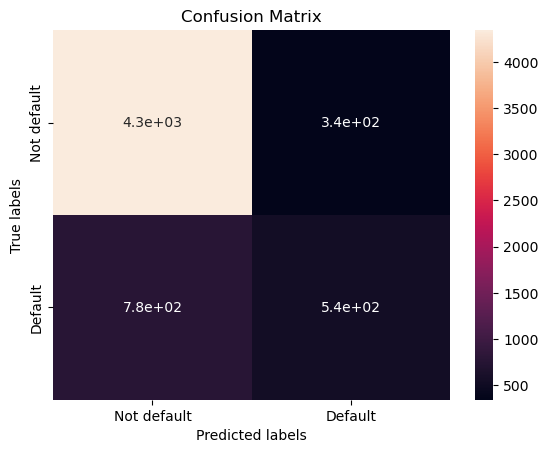

In [110]:
# Compute confusion matrix using numeric labels
cm = confusion_matrix(Y_test_numeric, x_pred)
print(cm)

# Plot confusion matrix
labels = ['Not default', 'Default']
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax)  # annot = True to annotate cells

# Labels, title, and ticks
ax.set_xlabel("Predicted labels")
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [111]:
y_pred_prob_ = random_search.predict_proba(X_test)[:, 1]

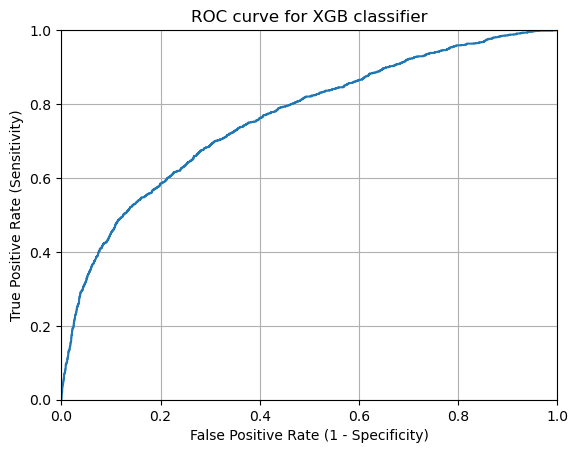

In [112]:
#ROC Curve graph
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob_, pos_label='Yes')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve for XGB classifier")
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)

In [113]:
print(metrics.roc_auc_score(Y_test, y_pred_prob_))

0.7617483564837422


Model - 5

###### Random Forest Classifier with corss validation

In [114]:
from sklearn.ensemble import RandomForestClassifier

Rfc = RandomForestClassifier(random_state=5, criterion='gini', class_weight='balanced')


In [115]:
Rfc_param_dict = {'n_estimators':[50, 100],
                 'max_depth': list(range(2, 15)),
                 'max_features': list(range(5, 15))}

In [116]:
grid_forest = GridSearchCV(Rfc, Rfc_param_dict, cv=5, scoring='f1', verbose=1, n_jobs=2)

In [117]:
grid_forest.fit(X_train, Y_train)

Fitting 5 folds for each of 260 candidates, totalling 1300 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=5),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [120]:
print(grid_forest.best_score_)
print(grid_forest.best_params_)
print(grid_forest.best_estimator_)

nan
{'max_depth': 2, 'max_features': 5, 'n_estimators': 50}
RandomForestClassifier(class_weight='balanced', max_depth=2, max_features=5,
                       n_estimators=50, random_state=5)


In [122]:
# Predict the testing set
forest_y_pred_train = grid_forest.best_estimator_.predict(X_train)

# Predict the training set
forest_y_pred_test = grid_forest.best_estimator_.predict(X_test)

In [124]:
print("F1 on train set: ", metrics.f1_score(Y_train, forest_y_pred_train, pos_label='Yes'))
print("F1 on test set: ", metrics.f1_score(Y_test, forest_y_pred_test, pos_label='Yes'))

F1 on train set:  0.5291828793774319
F1 on test set:  0.5284580889962057


In [126]:
train_tuned_forest = metrics.f1_score(Y_train, forest_y_pred_train, pos_label='Yes')
test_tuned_forest = metrics.f1_score(Y_test, forest_y_pred_test, pos_label='Yes')

In [127]:
metric_dict['Tuned Random Forest'] = {'Training F1': train_tuned_forest, 'Testing F1': test_tuned_forest}

[[3867  820]
 [ 547  766]]


[Text(0, 0.5, 'Not default'), Text(0, 1.5, 'default')]

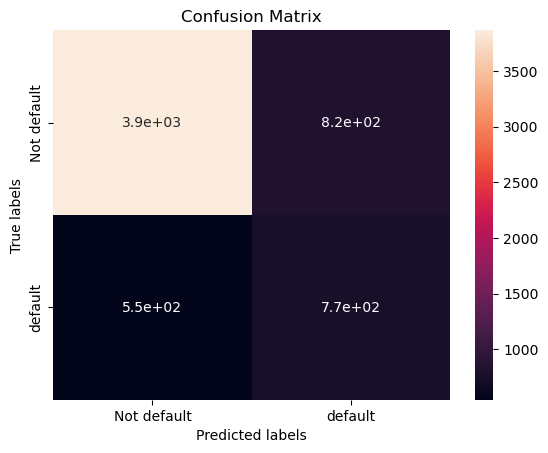

In [129]:
labels = ['Not default', 'default']
cm = confusion_matrix(Y_test, forest_y_pred_test)
print(cm)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot = True to annotate cells

#labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [130]:
y_pred_prob_2 = grid_forest.predict_proba(X_test)[:, 1]

In [131]:
y_pred_prob_2

array([0.4103467 , 0.36421357, 0.38792973, ..., 0.42863211, 0.54500857,
       0.41331008])

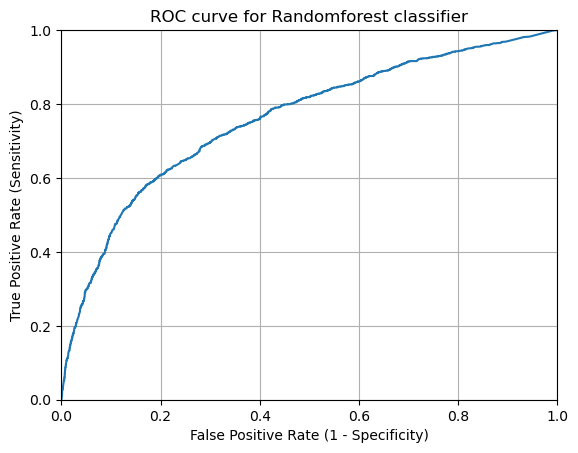

In [133]:
#ROC Curve graph
fpr, tpr, threshold = metrics.roc_curve(Y_test, y_pred_prob_2, pos_label='Yes')
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Randomforest classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [134]:
print(metrics.roc_auc_score(Y_test, y_pred_prob_2))

0.7592534064258045


###### Comparing All Model Evaluation Metrices

In [135]:
Evaluation_metric_comparison = pd.DataFrame.from_dict(metric_dict, orient='index')

In [136]:
Evaluation_metric_comparison

Training F1  Testing F1
Tuned KNN                             0.998777    0.276839
without cross Logistic Regression     0.398455    0.385473
Tuned Logistic Regression             0.393685    0.385457
without corss Decision Tree           0.998777    0.391639
Tuned Decision Tree                   0.448381    0.435417
Tuned XGB                             0.912619    0.490652
Tuned Random Forest                   0.529183    0.528458

1. Which Evealuation metrics did you consider for positive business impact and why?
> Since there is a high class imbalance so I have choosen F1 score as evaluation metrics for the positive business impact. The F1 score is concerened about precision and recall both 

2. Which ML model did you choose from the above created models as your final prediction model and why?
>As per the above implementation of modes the Random forest model has the best F1 score as the other models is not performing good so I would choose Random Forest Model.

# Conclusion

- We saw that our dataset had an uneven class. 


- The majority of credit card holders were female, while male clients had a high default ratio.


- Higher educated people are less likely to default, whereas fewer educated people are more likely to default.


- The likelihood of default increases after the age of 60 .


- In this scenario, 'Recall' is a significant parameter to compare all of the algorithms. Because the corporation cannot afford to anticipate a false negative, that is, to predict a defaulter as a non-defaulter. Since the corporation is the one who would deliver money to consumers, if for any reason, sending money to defaulter increases the risk of obtaining the investment returned. As a result, recognising false negatives is critical in this case.


- There was a high class imbalance in target variable

- I have used weights distance, balanced and SMOTE techniques to tackle the class imbalance

- I have implemented 5 classification models and chieved a fairly good results for only one algorithm due to highly class imbalance issue


- KNN
- Logistic Regression
- Decision Tree
- XG Boost
- Random Forest Classifier


- Random forest shows approx f1_score of 53% and the other models show approx 30-48% f1_score on the test data which shows most of the models have overfiting issue


- Random forest classifier performed better than all the other models
